# <center> <b>Personalized cancer diagnosis</b></center>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>

*   List item
*   List item


<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

* There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<b>Objective:</b> 
* Predict the probability of each data-point belonging to each of the nine classes.

<b>Constraints:</b>

* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train and test with 80%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,f1_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import nltk
nltk.download('stopwords')
from tqdm import tqdm
tqdm.pandas()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santhoshkurnapally/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
!gdown --id 1RmX5_q6D7rzoXD7nPUM_s8rKEf1KVMDi #training_text.zip download
!gdown --id 1bSQrw5WmDqqI8hBcr8Pflzatx4xCT0Ex #training_variants.zip download

zsh:1: command not found: wget
zsh:1: command not found: wget


In [6]:
!unzip training_text.zip
!unzip training_variants.zip

Archive:  training_text.zip
  inflating: training_text           
Archive:  training_variants.zip
  inflating: training_variants       


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [7]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [8]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [9]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))
def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "  
        data_text[column][index] = string

In [7]:
#text processing stage.
start_time = time.clock()
for index, row in tqdm(data_text.iterrows()):
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

1125it [00:17, 99.59it/s] 

there is no text description for id: 1109


1284it [00:19, 95.21it/s] 

there is no text description for id: 1277


1425it [00:20, 119.37it/s]

there is no text description for id: 1407


1656it [00:22, 113.99it/s]

there is no text description for id: 1639


2768it [00:34, 83.25it/s]

there is no text description for id: 2755


3321it [00:41, 80.68it/s] 

Time took for preprocessing the text : 38.309364 seconds


In [10]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


### lets check for null values 

In [11]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


We can see null values TEXT column lets replace null with gene and variation combination

In [12]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [13]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


<h3>3.1.3. Test, Train Split</h3>

<h4>3.1.3.1. Splitting data into train, test (80:20)</h4>

In [14]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)

<p> We split the data into train, test data sets, preserving the ratio of class distribution in the original data set  </p>

In [15]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])

Number of data points in train data: 2656
Number of data points in test data: 665


<h4>3.1.3.2. Distribution of y_i's in Train, Test  datasets</h4>

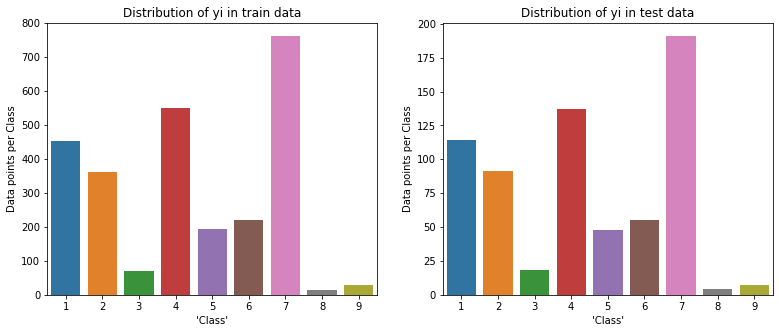


********** Train Values Percentages **********

Number of data points in class 7 : 762 ( 28.69 %)
Number of data points in class 4 : 549 ( 20.67 %)
Number of data points in class 1 : 454 ( 17.093 %)
Number of data points in class 2 : 361 ( 13.592 %)
Number of data points in class 6 : 220 ( 8.283 %)
Number of data points in class 5 : 194 ( 7.304 %)
Number of data points in class 3 : 71 ( 2.673 %)
Number of data points in class 9 : 30 ( 1.13 %)
Number of data points in class 8 : 15 ( 0.565 %)

********** Test Values Percentages **********

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)


In [16]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = X_train['Class'].value_counts().sort_index()
test_class_distribution = X_test['Class'].value_counts().sort_index()
list(train_class_distribution.index)
fig, ax =plt.subplots(1,2,figsize=(13, 5))
sns.barplot(x = list(train_class_distribution.index),y = train_class_distribution, ax=ax[0])
ax[0].set_xlabel("'Class'")
ax[0].set_ylabel('Data points per Class')
ax[0].set_title('Distribution of yi in train data')
sns.barplot(x = list(test_class_distribution.index),y = test_class_distribution, ax=ax[1])
ax[1].set_xlabel("'Class'")
ax[1].set_ylabel('Data points per Class')
ax[1].set_title('Distribution of yi in test data')
fig.show()
plt.show()
sorted_yi = np.argsort(-train_class_distribution.values)
print('\n'+'*'*10 + ' Train Values Percentages '+'*'*10+'\n')
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3), '%)')
print('\n'+'*'*10 + ' Test Values Percentages '+'*'*10+'\n')
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/X_test.shape[0]*100), 3), '%)')

### 3.1.3.3 Creating result dataset and metrics function

In [17]:
result_dataset_onehot = pd.DataFrame(data =np.zeros((3,8)) , index = ['accuracy_score','f1_score','log_loss'],columns = ['Random','KNN','NB','LR','SVC','DT','RF','XGB'])
result_dataset_response_coding = pd.DataFrame(data =np.zeros((3,8)) , index = ['accuracy_score','f1_score','log_loss'],columns = ['Random','KNN','NB','LR','SVC','DT','RF','XGB'])

In [18]:
def metrics(classfier,X_test,y_test,name,dataset):
  if isinstance(classfier, list):
    y_pred = classfier[1]
    y_prob = classfier[0][:,:]
  else:
    y_pred = classfier.predict(X_test)
    y_prob = classfier.predict_proba(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  logloss = log_loss(y_test,y_prob,labels=[1,2,3,4,5,6,7,8,9],eps=1e-15)
  f1score = f1_score(y_test,y_pred,average='weighted')
  dataset[name]['accuracy_score'] = accuracy
  dataset[name]['f1_score'] = f1score
  dataset[name]['log_loss'] = logloss
  print("accuracy score :",accuracy)
  print("f1 score :",f1score)
  print("log loss :",logloss)
  print('classification report : \n', classification_report(y_test,y_pred))
  print('******************************************** confusion matrx ********************************************')
  C = confusion_matrix(y_test, y_pred)
  A =(((C.T)/(C.sum(axis=1))).T)
  B =(C/C.sum(axis=0))
  plt.figure(figsize=(20,10))
  labels = [1,2,3,4,5,6,7,8,9]
  cmap=sns.light_palette("blue")
  sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title("Confusion matrix")
  plt.show()

  print('******************************************** Precision matrx ********************************************')
  plt.figure(figsize=(20,10))
  sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title("Precision matrix")
  plt.show()

  print('******************************************** Precision matrx ********************************************')
  plt.figure(figsize=(20,10))
  # representing B in heatmap format
  sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title("Recall matrix")
  plt.show()

## 4.0 lets create a random model

accuracy score : 0.10977443609022557
f1 score : 0.12939159565578176
log loss : 2.470549605157379
classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.21      0.15      0.17       114
           2       0.11      0.09      0.10        91
           3       0.01      0.06      0.02        18
           4       0.19      0.11      0.14       137
           5       0.06      0.08      0.07        48
           6       0.11      0.16      0.13        55
           7       0.25      0.10      0.14       191
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         7

    accuracy                           0.11       665
   macro avg       0.09      0.07      0.08       665
weighted avg       0.18      0.11      0.13       665

******************************************** confusion matrx ********************************************


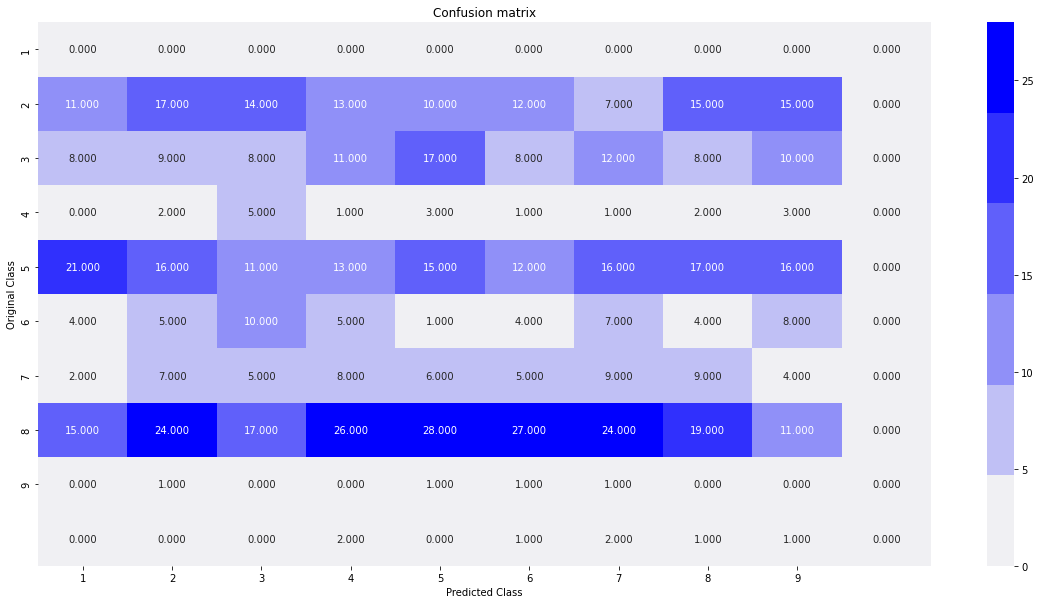

******************************************** Precision matrx ********************************************


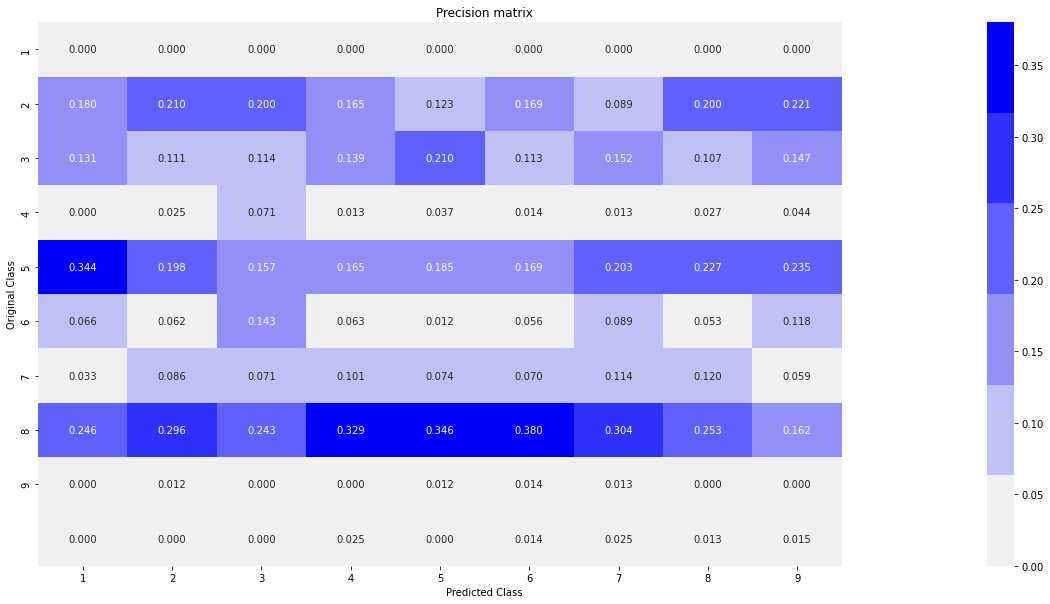

******************************************** Precision matrx ********************************************


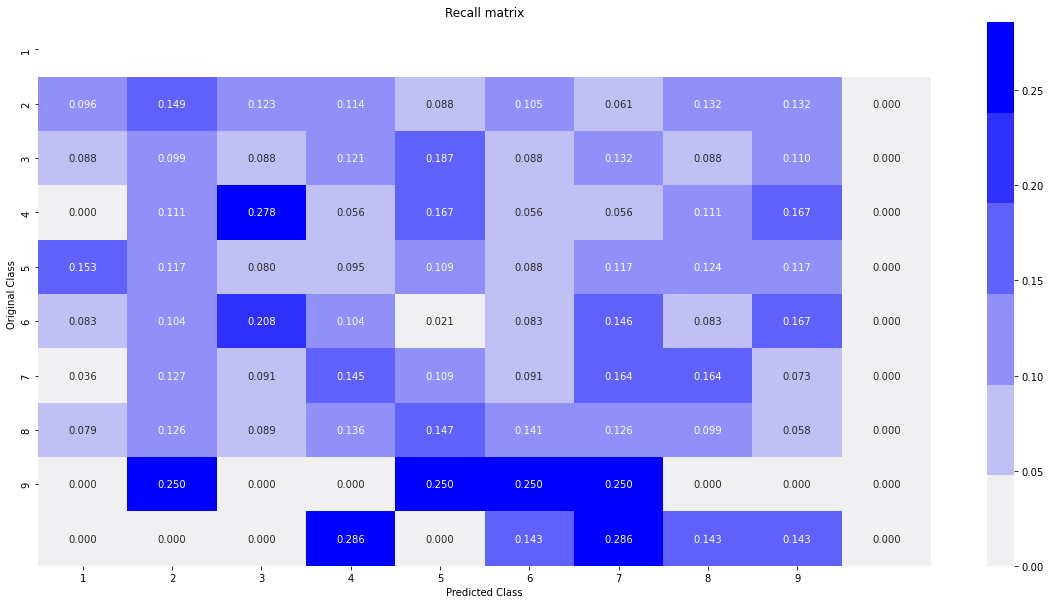

accuracy score : 0.10977443609022557
f1 score : 0.12939159565578176
log loss : 2.470549605157379
classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.21      0.15      0.17       114
           2       0.11      0.09      0.10        91
           3       0.01      0.06      0.02        18
           4       0.19      0.11      0.14       137
           5       0.06      0.08      0.07        48
           6       0.11      0.16      0.13        55
           7       0.25      0.10      0.14       191
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         7

    accuracy                           0.11       665
   macro avg       0.09      0.07      0.08       665
weighted avg       0.18      0.11      0.13       665

******************************************** confusion matrx ********************************************


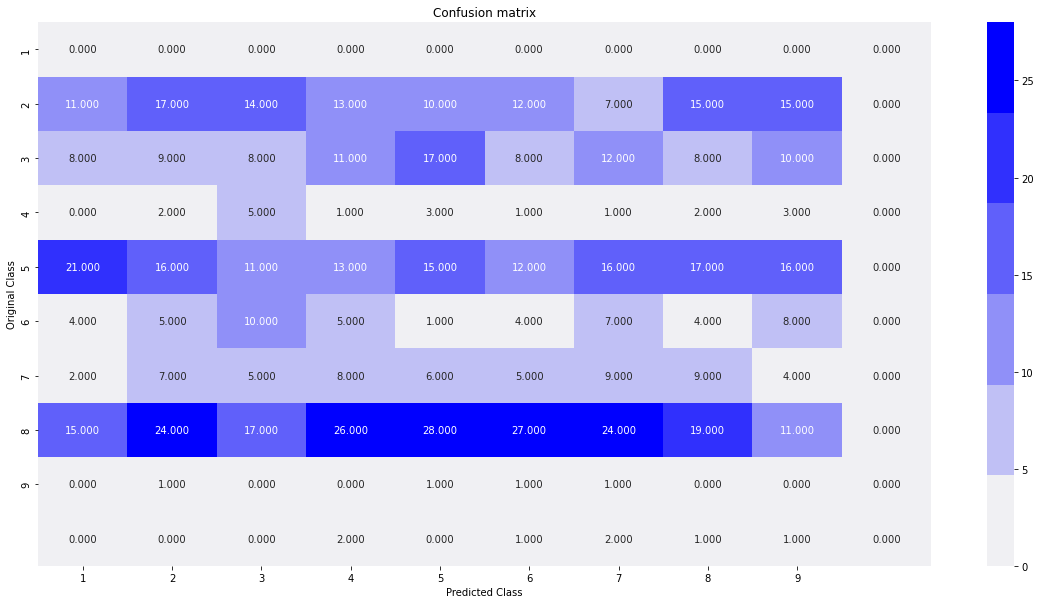

******************************************** Precision matrx ********************************************


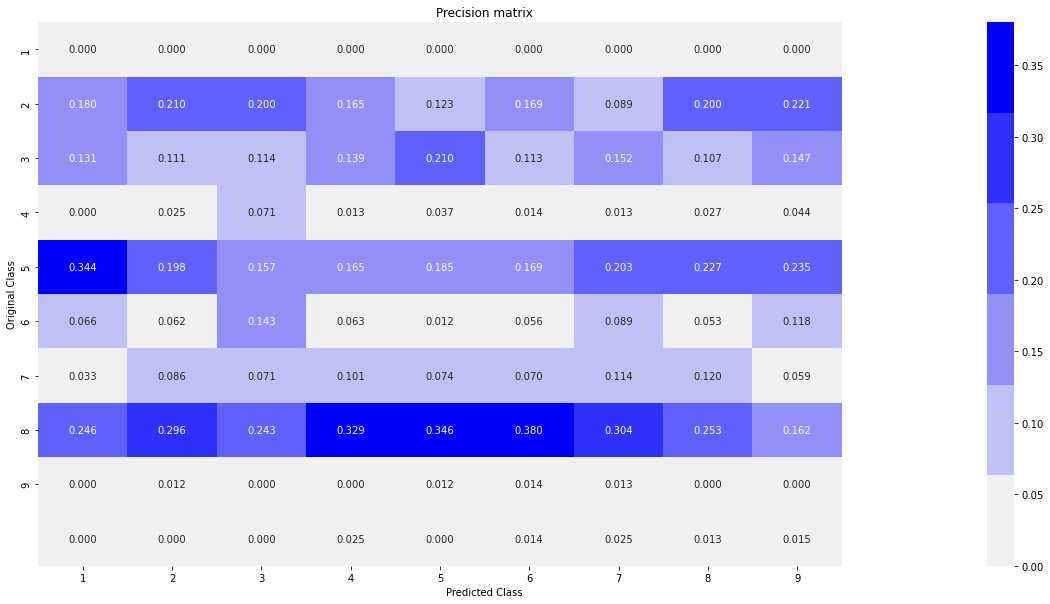

******************************************** Precision matrx ********************************************


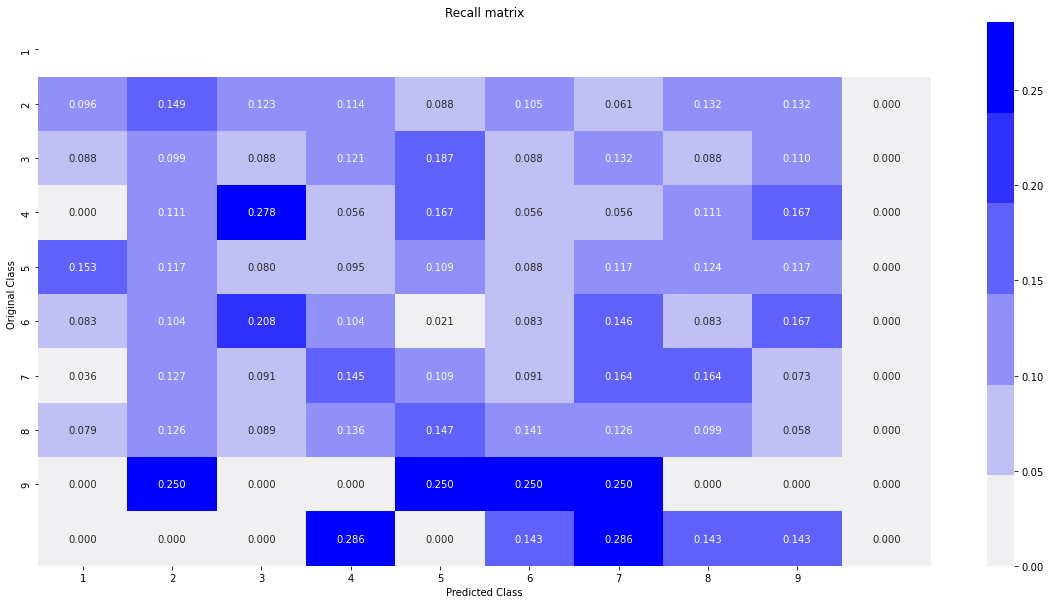

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f1_score,0.129392,0.0,0.0,0.0,0.0,0.0,0.0,0.0
log_loss,2.470550,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = X_test.shape[0]

# we create a output array that has exactly same size as the CV data
rand_y_prob = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    rand_y_prob[i] = ((rand_probs/sum(sum(rand_probs)))[0])
rand_y_pred =np.argmax(rand_y_prob, axis=1)
metrics([rand_y_prob,rand_y_pred],X_test,y_test,'Random',result_dataset_onehot)
metrics([rand_y_prob,rand_y_pred],X_test,y_test,'Random',result_dataset_response_coding)
result_dataset_onehot
result_dataset_response_coding

### 4.1 Univariate Analysis

In [20]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = X_train[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(X_train['Class']==1) & (X_train['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = X_train.loc[(X_train['Class']==k) & (X_train[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = X_train[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

### 4.2.1 Univariate Analysis on Gene Feature

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [21]:
unique_genes = X_train['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 254
BRCA1     220
TP53      126
EGFR      106
PTEN       99
BRCA2      98
KIT        80
BRAF       71
ERBB2      54
ALK        53
PDGFRA     51
Name: Gene, dtype: int64


In [22]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 254 different categories of genes in the train data, and they are distibuted as follows


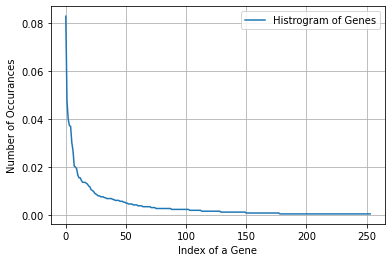

In [28]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


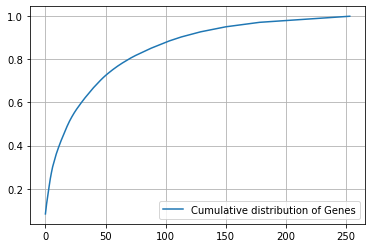

In [29]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [30]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", X_train))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", X_test))

In [31]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2656, 9)


In [32]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(X_train['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(X_test['Gene'])

In [33]:
X_train['Gene'].head()

0     BRCA1
1      PTEN
2    CTNNB1
3      EGFR
4      PTEN
Name: Gene, dtype: object

In [34]:
gene_vectorizer.get_feature_names()

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1b',
 'arid2',
 'asxl1',
 'asxl2',
 'atm',
 'atr',
 'atrx',
 'aurka',
 'aurkb',
 'axin1',
 'axl',
 'b2m',
 'bap1',
 'bard1',
 'bcl10',
 'bcl2',
 'bcl2l11',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd2',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdk6',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'cdkn2c',
 'cebpa',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctla4',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'egfr',
 'eif1ax',
 'elf3',
 'ep300',
 'epas1',
 'epcam',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'errfi1',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fam58a',
 'fanca',
 'fancc',
 'fat1',
 'fbxw7',
 'fgf19',
 'fgf3',
 'fgf4',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt1',
 'flt3',
 'foxa1',
 'foxl2',
 'foxo1',
 'foxp1',
 'fubp1',
 'gata3',
 'gli1',
 'gnaq',
 'gnas

In [35]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2656, 253)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

In [39]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

gene_vectorizer_ct =  ColumnTransformer([("onehotencoding", CountVectorizer(), 0)],remainder = "passthrough")
sgd_clf = SGDClassifier(loss='log', random_state=42)
calibration = CalibratedClassifierCV(base_estimator = sgd_clf,method="sigmoid")
pipe = Pipeline([('gene_vectorizer_ct',gene_vectorizer_ct),('calibration',calibration)])
params = {'calibration__base_estimator__alpha' : [10 ** x for x in range(-5, 1)] ,'calibration__base_estimator__penalty' : ['l1','l2','elasticnet']}
grid_clf = GridSearchCV(pipe, params, cv=5, scoring='neg_log_loss',return_train_score=True,verbose =10,n_jobs = -1)
grid_clf.fit(X_train.iloc[:,[1]], y_train)
grid_clf.best_params_


Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'calibration__base_estimator__alpha': 0.0001,
 'calibration__base_estimator__penalty': 'elasticnet'}

In [40]:
frame = pd.DataFrame(data = grid_clf.cv_results_)[['param_calibration__base_estimator__alpha','param_calibration__base_estimator__penalty','mean_train_score','mean_test_score']]
frame['loss difference'] = frame['mean_train_score'] - frame['mean_test_score']
frame.sort_values(by = ['mean_test_score','mean_train_score','loss difference'], ascending = [False,False,True])

,param_calibration__base_estimator__alpha,param_calibration__base_estimator__penalty,mean_train_score,mean_test_score,loss difference
5,0.0001,elasticnet,-0.985760,-1.178977,0.193217
4,0.0001,l2,-0.984935,-1.179303,0.194368
3,0.0001,l1,-0.991032,-1.183481,0.192449
1,0.00001,l2,-0.994462,-1.198779,0.204317
2,0.00001,elasticnet,-0.994907,-1.199112,0.204204
0,0.00001,l1,-1.018758,-1.218033,0.199276
7,0.001,l2,-1.089839,-1.222962,0.133123
8,0.001,elasticnet,-1.121650,-1.242075,0.120425
6,0.001,l1,-1.264240,-1.339775,0.075535
10,0.01,l2,-1.266623,-1.341886,0.075262


In [41]:
sgd_clf = SGDClassifier(alpha = grid_clf.best_params_['calibration__base_estimator__alpha'],penalty = grid_clf.best_params_['calibration__base_estimator__penalty'],loss='log', random_state=42)
calibration = CalibratedClassifierCV(base_estimator = sgd_clf,method="sigmoid")
pipe = Pipeline([('gene_vectorizer_ct',gene_vectorizer_ct),('calibration',calibration)])
pipe.fit(X_train.iloc[:,[1]], y_train)
y_pred = pipe.predict(X_test.iloc[:,[1]])
y_pred_proba = pipe.predict_proba(X_test.iloc[:,[1]])
print('For values of best alpha = ', grid_clf.best_params_['calibration__base_estimator__alpha'], "The test log loss is:",log_loss(y_test, y_pred_proba, labels=[1,2,3,4,5,6,7,8,9], eps=1e-15))


For values of best alpha =  0.0001 The test log loss is: 1.1645459914098726


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [42]:
print("Q6. How many data points in Test datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=X_test[X_test['Gene'].isin(list(set(X_train['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',X_test.shape[0], ":",(test_coverage/X_test.shape[0])*100)

Q6. How many data points in Test datasets are covered by the  254  genes in train dataset?
Ans
1. In test data 655 out of 665 : 98.49624060150376


### Univariate Analysis on Variation Feature

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [43]:
unique_variations = X_train['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 2404
Truncating_Mutations    78
Deletion                58
Amplification           55
Fusions                 28
Overexpression           5
G12V                     4
Q61H                     3
T58I                     3
T73I                     2
M1R                      2
Name: Variation, dtype: int64


In [44]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 2404 different categories of variations in the train data, and they are distibuted as follows


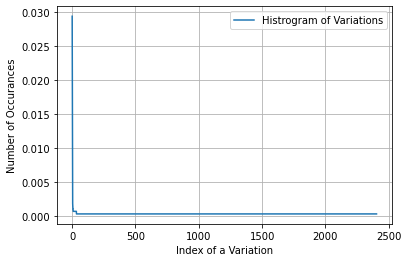

In [45]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02936747 0.05120482 0.07191265 ... 0.99924699 0.99962349 1.        ]


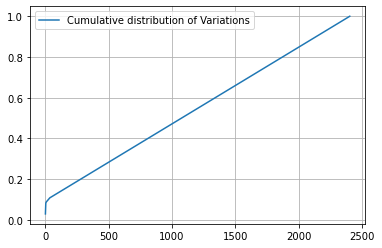

In [46]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [47]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", X_train))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", X_test))

In [48]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2656, 9)


In [49]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(X_train['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(X_test['Variation'])

In [50]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2656, 2435)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

In [51]:
variation_vectorizer_ct =  ColumnTransformer([("onehotencoding", CountVectorizer(), 0)],remainder = "passthrough")
sgd_clf = SGDClassifier(loss='log', random_state=42)
calibration = CalibratedClassifierCV(base_estimator = sgd_clf,method="sigmoid")
pipe = Pipeline([('variation_vectorizer_ct',variation_vectorizer_ct),('calibration',calibration)])
params = {'calibration__base_estimator__alpha' : [10 ** x for x in range(-5, 1)] ,'calibration__base_estimator__penalty' : ['l1','l2','elasticnet']}
grid_clf = GridSearchCV(pipe, params, cv=5, scoring='neg_log_loss',return_train_score=True,verbose = 10 , n_jobs = -1)
grid_clf.fit(X_train.iloc[:,[2]], y_train)
grid_clf.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'calibration__base_estimator__alpha': 0.0001,
 'calibration__base_estimator__penalty': 'l2'}

In [52]:
frame = pd.DataFrame(data = grid_clf.cv_results_)[['param_calibration__base_estimator__alpha','param_calibration__base_estimator__penalty','mean_train_score','mean_test_score']]
frame['loss difference'] = frame['mean_train_score'] - frame['mean_test_score']
frame.sort_values(by = ['mean_test_score','mean_train_score','loss difference'], ascending = [False,False,True])

,param_calibration__base_estimator__alpha,param_calibration__base_estimator__penalty,mean_train_score,mean_test_score,loss difference
4,0.0001,l2,-0.683918,-1.707177,1.023259
5,0.0001,elasticnet,-0.723176,-1.708197,0.985021
7,0.001,l2,-1.059300,-1.709469,0.650169
1,0.00001,l2,-0.616745,-1.711463,1.094718
2,0.00001,elasticnet,-0.626486,-1.712892,1.086406
8,0.001,elasticnet,-1.282857,-1.715074,0.432217
3,0.0001,l1,-0.854453,-1.719616,0.865163
10,0.01,l2,-1.436838,-1.720099,0.283260
0,0.00001,l1,-0.730910,-1.723911,0.993000
6,0.001,l1,-1.718683,-1.727413,0.008730


In [53]:
sgd_clf = SGDClassifier(alpha = grid_clf.best_params_['calibration__base_estimator__alpha'],penalty = grid_clf.best_params_['calibration__base_estimator__penalty'],loss='log', random_state=42)
calibration = CalibratedClassifierCV(base_estimator = sgd_clf,method="sigmoid")
pipe = Pipeline([('variation_vectorizer_ct',variation_vectorizer_ct),('calibration',calibration)])
pipe.fit(X_train.iloc[:,[1]], y_train)
y_pred = pipe.predict(X_test.iloc[:,[1]])
y_pred_proba = pipe.predict_proba(X_test.iloc[:,[1]])
y_pred_proba_train = pipe.predict_proba(X_train.iloc[:,[1]])
print('For values of best alpha = ', grid_clf.best_params_['calibration__base_estimator__alpha'], "The train log loss is:",log_loss(y_train, y_pred_proba_train, labels=[1,2,3,4,5,6,7,8,9], eps=1e-15))
print('For values of best alpha = ', grid_clf.best_params_['calibration__base_estimator__alpha'], "The test log loss is:",log_loss(y_test, y_pred_proba, labels=[1,2,3,4,5,6,7,8,9], eps=1e-15))


For values of best alpha =  0.0001 The train log loss is: 0.9904085192344771
For values of best alpha =  0.0001 The test log loss is: 1.1637093502316707


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [54]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=X_test[X_test['Variation'].isin(list(set(X_train['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',X_test.shape[0], ":",(test_coverage/X_test.shape[0])*100)

Q12. How many data points are covered by total  2404  genes in test and cross validation data sets?
Ans
1. In test data 70 out of 665 : 10.526315789473683


### Univariate Analysis on Text Feature

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [55]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [56]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [57]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(X_train['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 60223


In [58]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = X_train[X_train['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(X_train)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [59]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(X_train)
test_text_feature_responseCoding  = get_text_responsecoding(X_test)

In [60]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T

In [61]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(X_test['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

In [62]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [63]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({3: 5988, 4: 4299, 5: 3065, 6: 2840, 7: 2567, 9: 2140, 8: 2119, 10: 1751, 12: 1460, 11: 1300, 15: 1071, 16: 996, 13: 990, 20: 894, 14: 854, 18: 747, 24: 716, 17: 693, 19: 584, 21: 558, 22: 535, 30: 418, 23: 409, 25: 402, 26: 385, 32: 379, 27: 352, 28: 351, 50: 342, 36: 333, 33: 321, 29: 321, 40: 319, 31: 314, 34: 265, 35: 261, 39: 241, 42: 234, 48: 229, 67: 227, 41: 221, 44: 210, 37: 208, 38: 202, 43: 196, 45: 195, 49: 186, 54: 184, 47: 165, 60: 162, 51: 161, 52: 157, 46: 155, 56: 148, 53: 147, 58: 143, 69: 138, 55: 136, 72: 127, 59: 125, 70: 124, 64: 122, 66: 120, 62: 119, 68: 118, 57: 118, 84: 117, 61: 116, 63: 110, 78: 108, 76: 108, 80: 104, 65: 101, 96: 99, 81: 99, 77: 99, 71: 97, 100: 95, 74: 95, 79: 91, 73: 90, 88: 88, 82: 87, 83: 86, 75: 85, 87: 80, 90: 73, 95: 72, 93: 69, 89: 68, 86: 68, 97: 67, 94: 64, 105: 63, 91: 61, 85: 61, 102: 60, 92: 60, 117: 59, 115: 59, 112: 59, 122: 58, 108: 58, 125: 57, 103: 56, 111: 55, 99: 55, 120: 54, 144: 53, 127: 53, 110: 52, 114: 51, 10

In [64]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
#alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

In [65]:
text_vectorizer_ct =  ColumnTransformer([("onehotencoding", CountVectorizer(), 0)],remainder = "passthrough")
sgd_clf = SGDClassifier(loss='log', random_state=42)
calibration = CalibratedClassifierCV(base_estimator = sgd_clf,method="sigmoid")
pipe = Pipeline([('text_vectorizer_ct',text_vectorizer_ct),('calibration',calibration)])
params = {'calibration__base_estimator__alpha' : [10 ** x for x in range(-5, -4)] ,'calibration__base_estimator__penalty' : ['l1','l2','elasticnet']}
grid_clf = GridSearchCV(pipe, params, cv=2, scoring='neg_log_loss',return_train_score=True,verbose = 10,n_jobs = -1)
grid_clf.fit(X_train.iloc[:,[4]], y_train)
grid_clf.best_params_

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 3/5; 1/18] START calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=l1
[CV 3/5; 1/18] END calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=l1;, score=(train=-1.010, test=-1.216) total time=   0.8s
[CV 2/5; 3/18] START calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=elasticnet
[CV 2/5; 3/18] END calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=elasticnet;, score=(train=-0.993, test=-1.185) total time=   0.8s
[CV 5/5; 4/18] START calibration__base_estimator__alpha=0.0001, calibration__base_estimator__penalty=l1
[CV 5/5; 4/18] END calibration__base_estimator__alpha=0.0001, calibration__base_estimator__penalty=l1;, score=(train=-1.009, test=-1.145) total time=   0.5s
[CV 3/5; 6/18] START calibration__base_estimator__alpha=0.0001, calibration__base_estimator__penalty=elasticnet
[CV 3/5; 6/18] END calibration__ba

[CV 1/5; 2/18] START calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=l2
[CV 1/5; 2/18] END calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=l2;, score=(train=-1.008, test=-1.165) total time=   0.8s
[CV 3/5; 3/18] START calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=elasticnet
[CV 3/5; 3/18] END calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=elasticnet;, score=(train=-0.990, test=-1.204) total time=   0.8s
[CV 2/5; 5/18] START calibration__base_estimator__alpha=0.0001, calibration__base_estimator__penalty=l2
[CV 2/5; 5/18] END calibration__base_estimator__alpha=0.0001, calibration__base_estimator__penalty=l2;, score=(train=-0.986, test=-1.174) total time=   0.5s
[CV 4/5; 6/18] START calibration__base_estimator__alpha=0.0001, calibration__base_estimator__penalty=elasticnet
[CV 4/5; 6/18] END calibration__base_estimator__alpha=0.0001, calibration__base_estimator__pe

[CV 4/5; 1/18] START calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=l1
[CV 4/5; 1/18] END calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=l1;, score=(train=-0.989, test=-1.289) total time=   0.8s
[CV 5/5; 2/18] START calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=l2
[CV 5/5; 2/18] END calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=l2;, score=(train=-1.018, test=-1.171) total time=   0.8s
[CV 4/5; 4/18] START calibration__base_estimator__alpha=0.0001, calibration__base_estimator__penalty=l1
[CV 4/5; 4/18] END calibration__base_estimator__alpha=0.0001, calibration__base_estimator__penalty=l1;, score=(train=-0.966, test=-1.260) total time=   0.5s
[CV 2/5; 6/18] START calibration__base_estimator__alpha=0.0001, calibration__base_estimator__penalty=elasticnet
[CV 2/5; 6/18] END calibration__base_estimator__alpha=0.0001, calibration__base_estimator__penalty=elasticnet

{'calibration__base_estimator__alpha': 1e-05,
 'calibration__base_estimator__penalty': 'l1'}

[CV 3/5; 2/18] START calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=l2
[CV 3/5; 2/18] END calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=l2;, score=(train=-0.987, test=-1.202) total time=   0.8s
[CV 1/5; 4/18] START calibration__base_estimator__alpha=0.0001, calibration__base_estimator__penalty=l1
[CV 1/5; 4/18] END calibration__base_estimator__alpha=0.0001, calibration__base_estimator__penalty=l1;, score=(train=-1.002, test=-1.145) total time=   0.5s
[CV 2/5; 4/18] START calibration__base_estimator__alpha=0.0001, calibration__base_estimator__penalty=l1
[CV 2/5; 4/18] END calibration__base_estimator__alpha=0.0001, calibration__base_estimator__penalty=l1;, score=(train=-0.991, test=-1.185) total time=   0.5s
[CV 5/5; 5/18] START calibration__base_estimator__alpha=0.0001, calibration__base_estimator__penalty=l2
[CV 5/5; 5/18] END calibration__base_estimator__alpha=0.0001, calibration__base_estimator__penalty=l2;, score=(trai

[CV 1/2; 3/3] START calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=elasticnet
[CV 1/2; 3/3] END calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=elasticnet;, score=(train=-1.835, test=-1.831) total time= 1.3min
[CV 2/2; 3/3] START calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=elasticnet
[CV 2/2; 3/3] END calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=elasticnet;, score=(train=-1.831, test=-1.834) total time= 1.3min
[CV 5/5; 1/18] START calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=l1
[CV 5/5; 1/18] END calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=l1;, score=(train=-1.046, test=-1.198) total time=   0.7s
[CV 4/5; 2/18] START calibration__base_estimator__alpha=1e-05, calibration__base_estimator__penalty=l2
[CV 4/5; 2/18] END calibration__base_estimator__alpha=1e-05, calibration__base_estimator__pe

In [66]:
frame = pd.DataFrame(data = grid_clf.cv_results_)[['param_calibration__base_estimator__alpha','param_calibration__base_estimator__penalty','mean_train_score','mean_test_score']]
frame['loss difference'] = frame['mean_train_score'] - frame['mean_test_score']
frame.sort_values(by = ['mean_test_score','mean_train_score','loss difference'], ascending = [False,False,True])

,param_calibration__base_estimator__alpha,param_calibration__base_estimator__penalty,mean_train_score,mean_test_score,loss difference
0,0.00001,l1,-1.832839,-1.832882,0.000043
1,0.00001,l2,-1.832839,-1.832882,0.000043
2,0.00001,elasticnet,-1.832839,-1.832882,0.000043


In [67]:
sgd_clf = SGDClassifier(alpha = grid_clf.best_params_['calibration__base_estimator__alpha'],penalty = grid_clf.best_params_['calibration__base_estimator__penalty'],loss='log', random_state=42)
calibration = CalibratedClassifierCV(base_estimator = sgd_clf,method="sigmoid")
pipe = Pipeline([('variation_vectorizer_ct',variation_vectorizer_ct),('calibration',calibration)])
pipe.fit(X_train.iloc[:,[4]], y_train)
y_pred = pipe.predict(X_test.iloc[:,[4]])
y_pred_proba = pipe.predict_proba(X_test.iloc[:,[4]])
y_pred_proba_train = pipe.predict_proba(X_train.iloc[:,[4]])
print('For values of best alpha = ', grid_clf.best_params_['calibration__base_estimator__alpha'], "The train log loss is:",log_loss(y_train, y_pred_proba_train, labels=[1,2,3,4,5,6,7,8,9], eps=1e-15))
print('For values of best alpha = ', grid_clf.best_params_['calibration__base_estimator__alpha'], "The test log loss is:",log_loss(y_test, y_pred_proba, labels=[1,2,3,4,5,6,7,8,9], eps=1e-15))


For values of best alpha =  1e-05 The train log loss is: 1.8318519452661115
For values of best alpha =  1e-05 The test log loss is: 1.8309929726433014


# Modeling with one hot encoded features

## Stacking the three types of features

In [68]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(X_train['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(X_test['Class']))

In [69]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2656, 62911)
(number of data points * number of features) in test data =  (665, 62911)


In [70]:

train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))


In [71]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2656, 27)
(number of data points * number of features) in test data =  (665, 27)


### KNN 

In [75]:
knn_clf_onehot = CalibratedClassifierCV(KNeighborsClassifier())
param_grids_onehot = {'base_estimator__n_neighbors' : [135],'method' : ['sigmoid','isotonic']}
knn_classif_onehot = GridSearchCV(estimator = knn_clf_onehot,param_grid = param_grids_onehot,cv = 3, scoring = 'neg_log_loss',verbose = 10,return_train_score=True)
knn_classif_onehot.fit(train_x_onehotCoding,y_train)
knn_classif_onehot.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3; 1/2] START base_estimator__n_neighbors=135, method=sigmoid.............
[CV 1/3; 1/2] END base_estimator__n_neighbors=135, method=sigmoid;, score=(train=-1.316, test=-1.481) total time=   9.6s
[CV 2/3; 1/2] START base_estimator__n_neighbors=135, method=sigmoid.............
[CV 2/3; 1/2] END base_estimator__n_neighbors=135, method=sigmoid;, score=(train=-1.365, test=-1.502) total time=   9.4s
[CV 3/3; 1/2] START base_estimator__n_neighbors=135, method=sigmoid.............
[CV 3/3; 1/2] END base_estimator__n_neighbors=135, method=sigmoid;, score=(train=-1.377, test=-1.520) total time=   9.3s
[CV 1/3; 2/2] START base_estimator__n_neighbors=135, method=isotonic............
[CV 1/3; 2/2] END base_estimator__n_neighbors=135, method=isotonic;, score=(train=-1.037, test=-1.320) total time=   9.3s
[CV 2/3; 2/2] START base_estimator__n_neighbors=135, method=isotonic............
[CV 2/3; 2/2] END base_estimator__n_neighbors=135, 

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=135),
                       method='isotonic')

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors=135))

accuracy score : 0.5473684210526316
f1 score : 0.5161116524632333
log loss : 1.254855006936599
classification report : 
               precision    recall  f1-score   support

           1       0.53      0.62      0.57       114
           2       0.64      0.20      0.30        91
           3       1.00      0.06      0.11        18
           4       0.54      0.55      0.54       137
           5       0.34      0.21      0.26        48
           6       0.64      0.49      0.56        55
           7       0.56      0.82      0.66       191
           8       0.00      0.00      0.00         4
           9       0.67      0.86      0.75         7

    accuracy                           0.55       665
   macro avg       0.55      0.42      0.42       665
weighted avg       0.56      0.55      0.52       665

******************************************** confusion matrx ********************************************


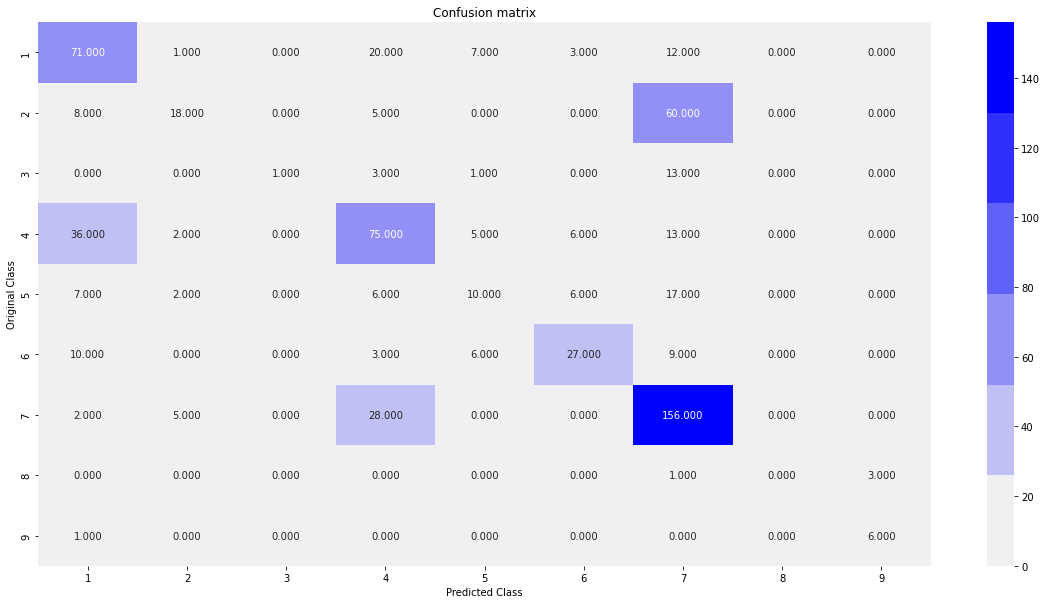

******************************************** Precision matrx ********************************************


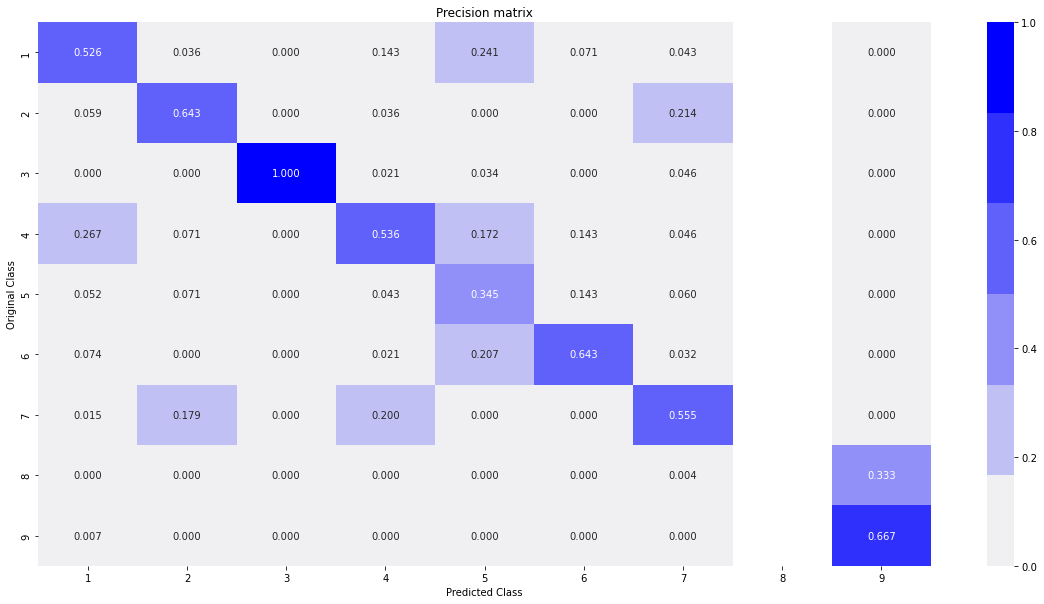

******************************************** Precision matrx ********************************************


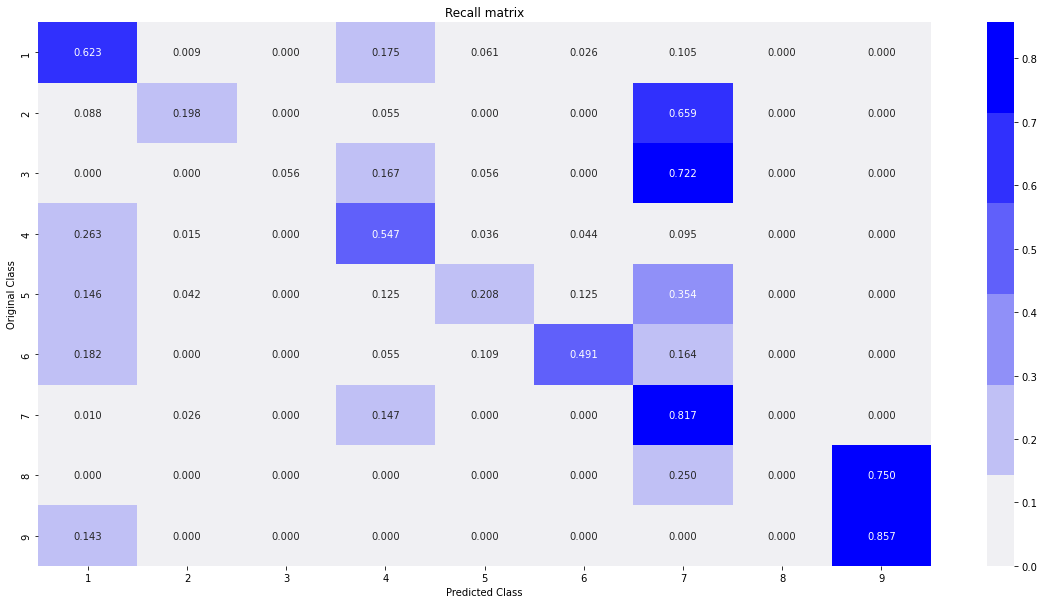

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.547368,0.0,0.0,0.0,0.0,0.0,0.0
f1_score,0.129392,0.516112,0.0,0.0,0.0,0.0,0.0,0.0
log_loss,2.470550,1.254855,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
metrics(knn_classif_onehot.best_estimator_,test_x_onehotCoding,test_y,'KNN',result_dataset_onehot)
result_dataset_onehot

In [ ]:
np.unique(test_y)

# Naive Bayes

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters are :  {'base_estimator__alpha': 1, 'method': 'isotonic'}
accuracy score : 0.6120300751879699
f1 score : 0.5891500236172689
log loss : 1.2800161354944415
classification report : 
               precision    recall  f1-score   support

           1       0.55      0.72      0.62       114
           2       0.53      0.34      0.41        91
           3       0.75      0.17      0.27        18
           4       0.71      0.64      0.67       137
           5       0.28      0.15      0.19        48
           6       0.76      0.51      0.61        55
           7       0.62      0.85      0.72       191
           8       0.00      0.00      0.00         4
           9       0.86      0.86      0.86         7

    accuracy                           0.61       665
   macro avg       0.56      0.47      0.48       665
weighted avg       0.60      0.61      0.59       665

**************************************

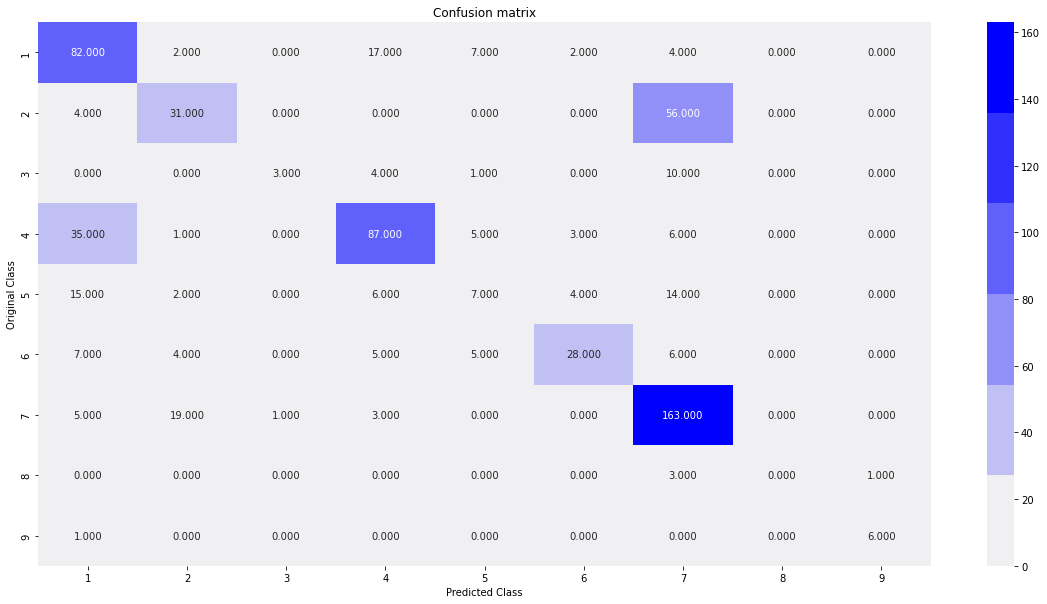

******************************************** Precision matrx ********************************************


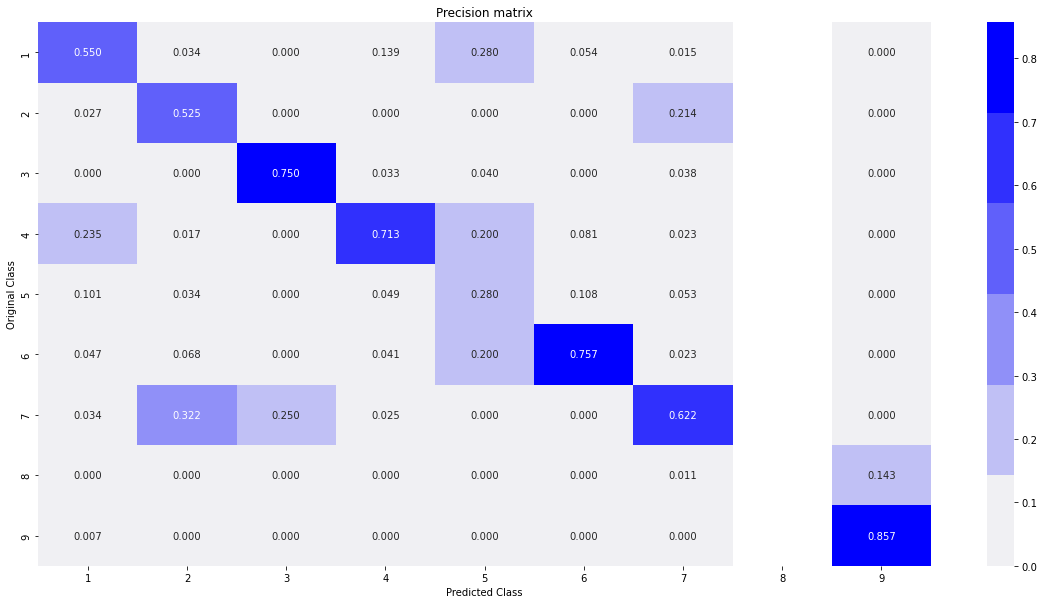

******************************************** Precision matrx ********************************************


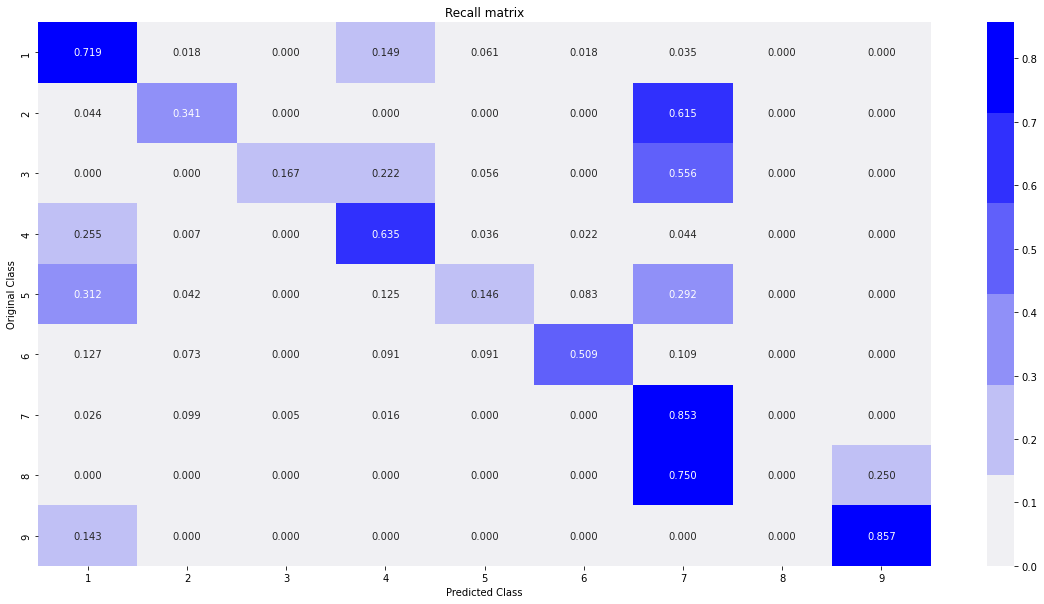

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.547368,0.612030,0.0,0.0,0.0,0.0,0.0
f1_score,0.129392,0.516112,0.589150,0.0,0.0,0.0,0.0,0.0
log_loss,2.470550,1.254855,1.280016,0.0,0.0,0.0,0.0,0.0


In [78]:
from sklearn.metrics import log_loss, make_scorer
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
naive_clf_one_hot =CalibratedClassifierCV(MultinomialNB())
param_grids = {'base_estimator__alpha' :  [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000],'method' : ['sigmoid','isotonic']}
naive_clf_one_hot = GridSearchCV(estimator = naive_clf_one_hot,param_grid = param_grids,cv = 3, scoring = LogLoss,verbose = 10,return_train_score=True,n_jobs = 4)
naive_clf_one_hot.fit(train_x_onehotCoding,y_train)
print("Best Parameters are : " ,naive_clf_one_hot.best_params_)
metrics(naive_clf_one_hot.best_estimator_,test_x_onehotCoding,test_y,'NB',result_dataset_onehot)
result_dataset_onehot

# Logistic Regeression

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters are :  {'base_estimator__alpha': 0.001, 'base_estimator__penalty': 'elasticnet', 'method': 'sigmoid'}
accuracy score : 0.6556390977443609
f1 score : 0.6375832421328468
log loss : 1.0354923566022847
classification report : 
               precision    recall  f1-score   support

           1       0.63      0.57      0.60       114
           2       0.66      0.42      0.51        91
           3       0.50      0.33      0.40        18
           4       0.69      0.72      0.71       137
           5       0.41      0.27      0.33        48
           6       0.70      0.60      0.65        55
           7       0.67      0.92      0.78       191
           8       0.00      0.00      0.00         4
           9       0.75      0.86      0.80         7

    accuracy                           0.66       665
   macro avg       0.56      0.52      0.53       665
weighted avg       0.64      0.66      0.64     

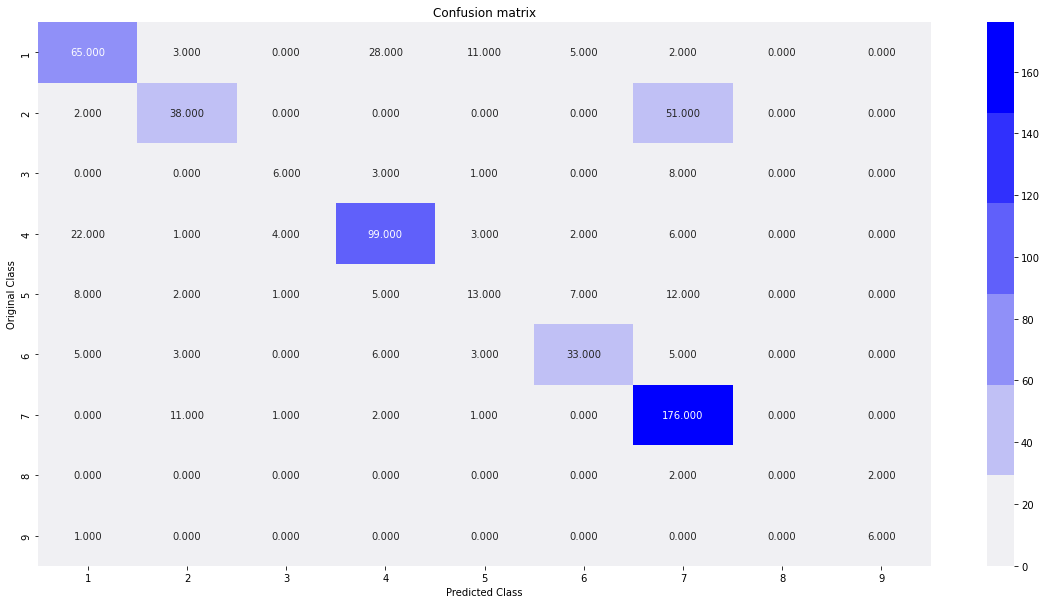

******************************************** Precision matrx ********************************************


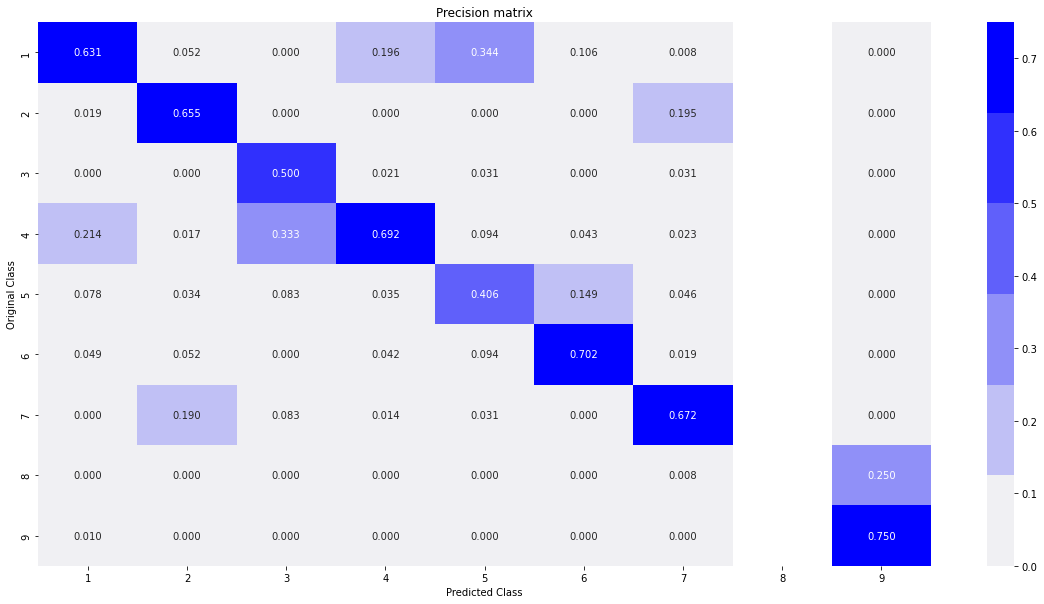

******************************************** Precision matrx ********************************************


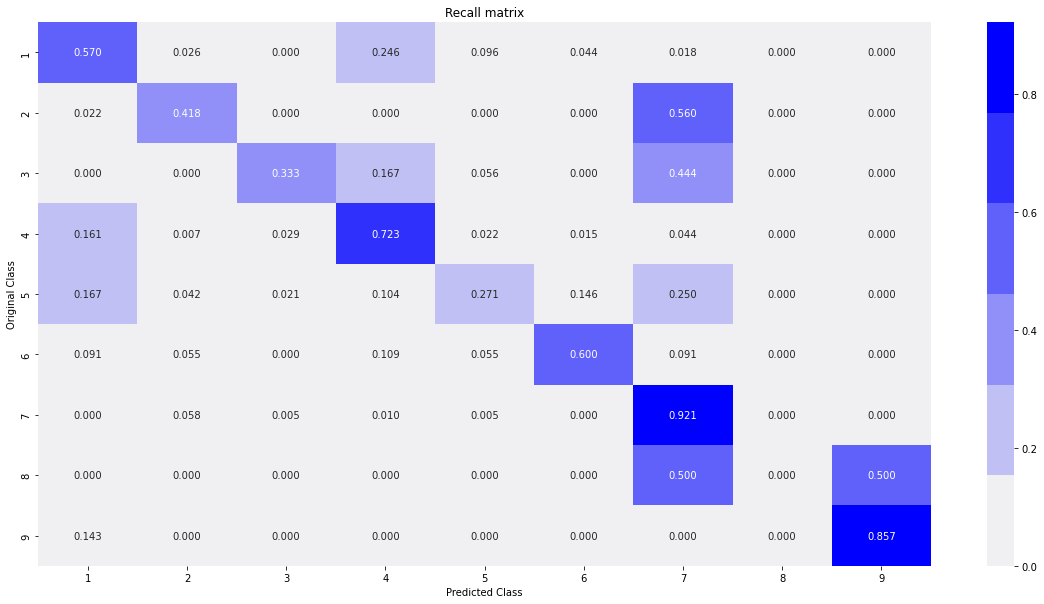

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.547368,0.612030,0.655639,0.0,0.0,0.0,0.0
f1_score,0.129392,0.516112,0.589150,0.637583,0.0,0.0,0.0,0.0
log_loss,2.470550,1.254855,1.280016,1.035492,0.0,0.0,0.0,0.0


[CV 2/3; 1/48] START base_estimator__alpha=1e-05, base_estimator__penalty=l1, method=sigmoid
[CV 2/3; 1/48] END base_estimator__alpha=1e-05, base_estimator__penalty=l1, method=sigmoid;, score=(train=-0.989, test=-1.399) total time=  33.1s
[CV 1/3; 3/48] START base_estimator__alpha=1e-05, base_estimator__penalty=l2, method=sigmoid
[CV 1/3; 3/48] END base_estimator__alpha=1e-05, base_estimator__penalty=l2, method=sigmoid;, score=(train=-0.878, test=-1.381) total time=  12.5s
[CV 3/3; 3/48] START base_estimator__alpha=1e-05, base_estimator__penalty=l2, method=sigmoid
[CV 3/3; 3/48] END base_estimator__alpha=1e-05, base_estimator__penalty=l2, method=sigmoid;, score=(train=-0.773, test=-1.330) total time=  13.2s
[CV 2/3; 4/48] START base_estimator__alpha=1e-05, base_estimator__penalty=l2, method=isotonic
[CV 2/3; 4/48] END base_estimator__alpha=1e-05, base_estimator__penalty=l2, method=isotonic;, score=(train=-0.475, test=-1.111) total time=  13.4s
[CV 2/3; 5/48] START base_estimator__alpha

[CV 1/3; 2/48] START base_estimator__alpha=1e-05, base_estimator__penalty=l1, method=isotonic
[CV 1/3; 2/48] END base_estimator__alpha=1e-05, base_estimator__penalty=l1, method=isotonic;, score=(train=-0.506, test=-1.206) total time=  31.3s
[CV 2/3; 2/48] START base_estimator__alpha=1e-05, base_estimator__penalty=l1, method=isotonic
[CV 2/3; 2/48] END base_estimator__alpha=1e-05, base_estimator__penalty=l1, method=isotonic;, score=(train=-0.504, test=-1.129) total time=  33.4s
[CV 3/3; 4/48] START base_estimator__alpha=1e-05, base_estimator__penalty=l2, method=isotonic
[CV 3/3; 4/48] END base_estimator__alpha=1e-05, base_estimator__penalty=l2, method=isotonic;, score=(train=-0.431, test=-1.272) total time=  13.0s
[CV 3/3; 5/48] START base_estimator__alpha=1e-05, base_estimator__penalty=elasticnet, method=sigmoid
[CV 3/3; 5/48] END base_estimator__alpha=1e-05, base_estimator__penalty=elasticnet, method=sigmoid;, score=(train=-0.794, test=-1.354) total time=  40.0s
[CV 1/3; 7/48] START b

[CV 1/3; 1/48] START base_estimator__alpha=1e-05, base_estimator__penalty=l1, method=sigmoid
[CV 1/3; 1/48] END base_estimator__alpha=1e-05, base_estimator__penalty=l1, method=sigmoid;, score=(train=-0.966, test=-1.425) total time=  32.7s
[CV 3/3; 2/48] START base_estimator__alpha=1e-05, base_estimator__penalty=l1, method=isotonic
[CV 3/3; 2/48] END base_estimator__alpha=1e-05, base_estimator__penalty=l1, method=isotonic;, score=(train=-0.480, test=-1.253) total time=  49.8s
[CV 1/3; 6/48] START base_estimator__alpha=1e-05, base_estimator__penalty=elasticnet, method=isotonic
[CV 1/3; 6/48] END base_estimator__alpha=1e-05, base_estimator__penalty=elasticnet, method=isotonic;, score=(train=-0.473, test=-1.262) total time=  39.0s
[CV 2/3; 7/48] START base_estimator__alpha=0.0001, base_estimator__penalty=l1, method=sigmoid
[CV 2/3; 7/48] END base_estimator__alpha=0.0001, base_estimator__penalty=l1, method=sigmoid;, score=(train=-0.841, test=-1.244) total time= 1.6min
[CV 3/3; 8/48] START b

In [80]:
logistic_clf_one_hot =CalibratedClassifierCV(SGDClassifier(loss = 'log',class_weight = 'balanced'))
param_grids = {'base_estimator__alpha' :  [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000],'base_estimator__penalty' : ['l1','l2','elasticnet'],'method' : ['sigmoid','isotonic']}
logistic_clf_one_hot = GridSearchCV(estimator = logistic_clf_one_hot,param_grid = param_grids,cv = 3, scoring = 'neg_log_loss',verbose = 10,return_train_score=True,n_jobs = 4)
logistic_clf_one_hot.fit(train_x_onehotCoding,y_train)
print("Best Parameters are : " ,logistic_clf_one_hot.best_params_)
metrics(logistic_clf_one_hot.best_estimator_,test_x_onehotCoding,test_y,'LR',result_dataset_onehot)
result_dataset_onehot

## SVC

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best Parameters are :  {'base_estimator__alpha': 0.001, 'method': 'sigmoid'}
accuracy score : 0.6631578947368421
f1 score : 0.6578353773235276
log loss : 1.1846241967557014
classification report : 
               precision    recall  f1-score   support

           1       0.64      0.59      0.61       114
           2       0.66      0.52      0.58        91
           3       0.52      0.67      0.59        18
           4       0.71      0.71      0.71       137
           5       0.42      0.42      0.42        48
           6       0.69      0.62      0.65        55
           7       0.70      0.83      0.76       191
           8       0.00      0.00      0.00         4
           9       0.86      0.86      0.86         7

    accuracy                           0.66       665
   macro avg       0.58      0.58      0.58       665
weighted avg       0.66      0.66      0.66       665

***********************************

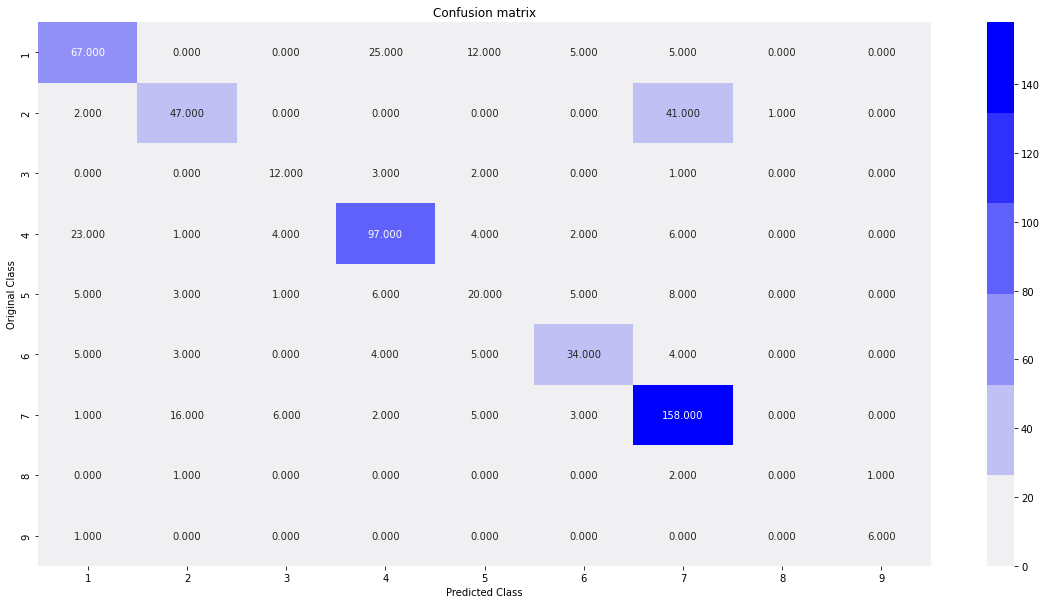

******************************************** Precision matrx ********************************************


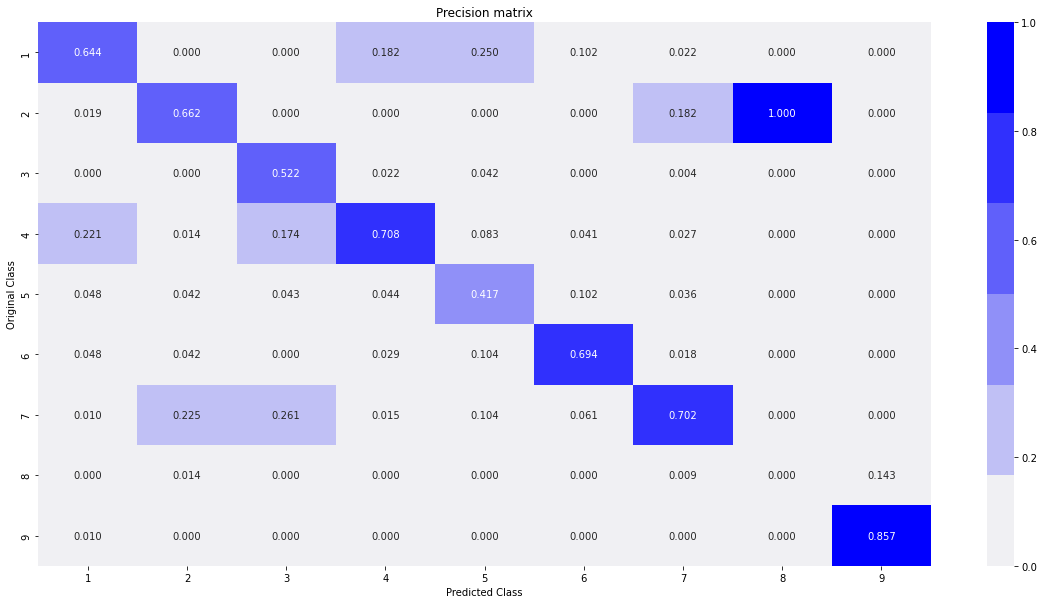

******************************************** Precision matrx ********************************************


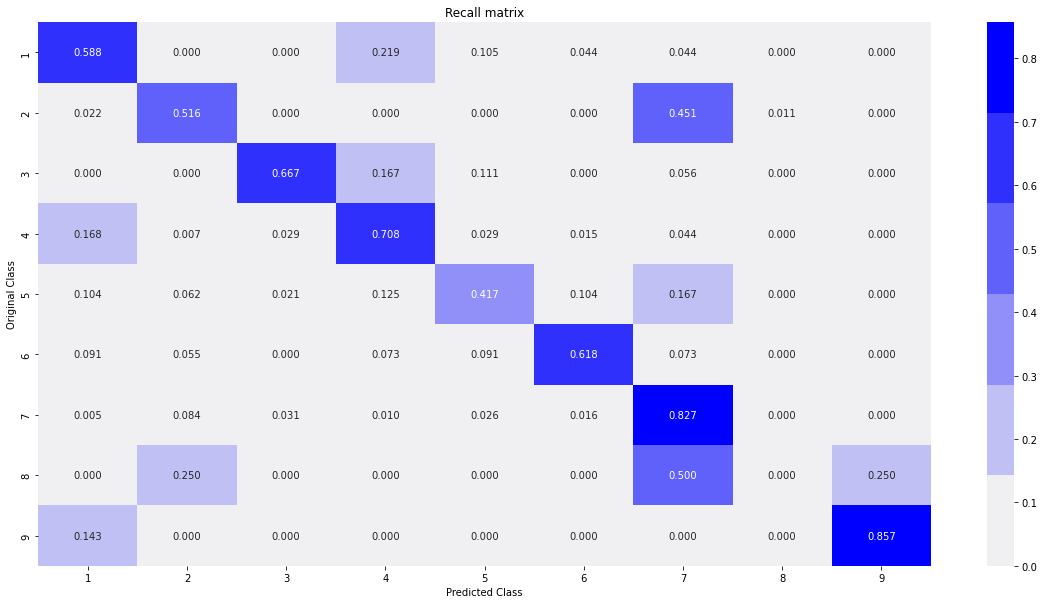

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.547368,0.612030,0.655639,0.663158,0.0,0.0,0.0
f1_score,0.129392,0.516112,0.589150,0.637583,0.657835,0.0,0.0,0.0
log_loss,2.470550,1.254855,1.280016,1.035492,1.184624,0.0,0.0,0.0


In [84]:
svc_clf_one_hot =CalibratedClassifierCV(SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42))
param_grids = {'base_estimator__alpha' :  [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000],'method' : ['sigmoid','isotonic']}
svc_clf_one_hot = GridSearchCV(estimator = svc_clf_one_hot,param_grid = param_grids,cv = 2, scoring = 'neg_log_loss',verbose = 10,return_train_score=True,n_jobs = 4)
svc_clf_one_hot.fit(train_x_onehotCoding,y_train)
print("Best Parameters are : " ,svc_clf_one_hot.best_params_)
metrics(svc_clf_one_hot.best_estimator_,test_x_onehotCoding,test_y,'SVC',result_dataset_onehot)
result_dataset_onehot

## Decision Trees

Fitting 2 folds for each of 24 candidates, totalling 48 fits
Best Parameters are :  {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 30, 'method': 'isotonic'}
accuracy score : 0.48120300751879697
f1 score : 0.4403048499732267
log loss : 1.5194169705901974
classification report : 
               precision    recall  f1-score   support

           1       0.42      0.30      0.35       114
           2       0.51      0.30      0.38        91
           3       0.00      0.00      0.00        18
           4       0.57      0.52      0.54       137
           5       0.10      0.04      0.06        48
           6       0.60      0.27      0.37        55
           7       0.47      0.86      0.61       191
           8       0.00      0.00      0.00         4
           9       0.60      0.86      0.71         7

    accuracy                           0.48       665
   macro avg       0.36      0.35      0.33       665
weighted avg       0.46      0.48      0.44       

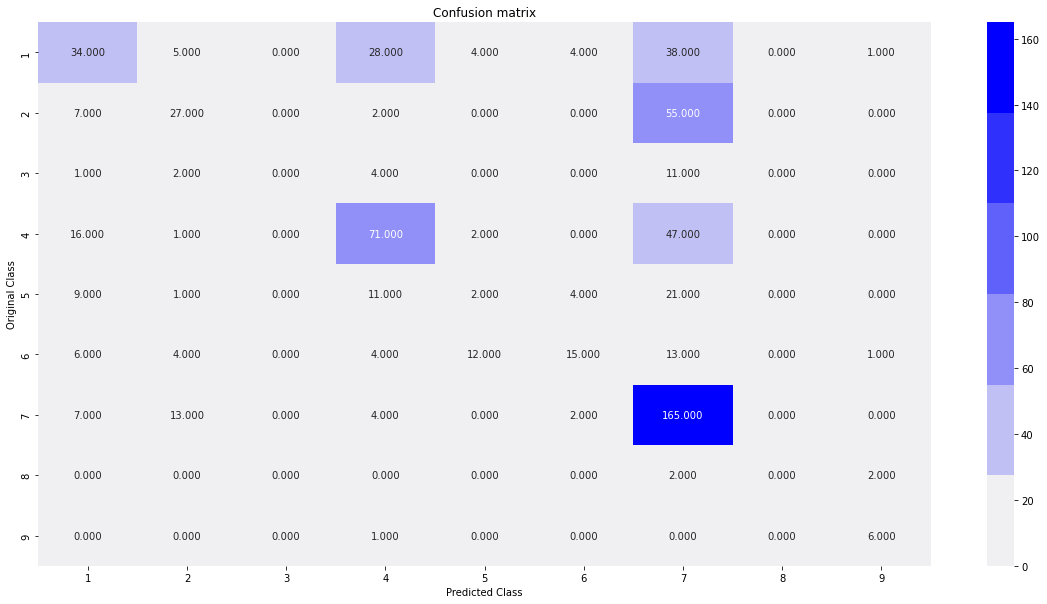

******************************************** Precision matrx ********************************************


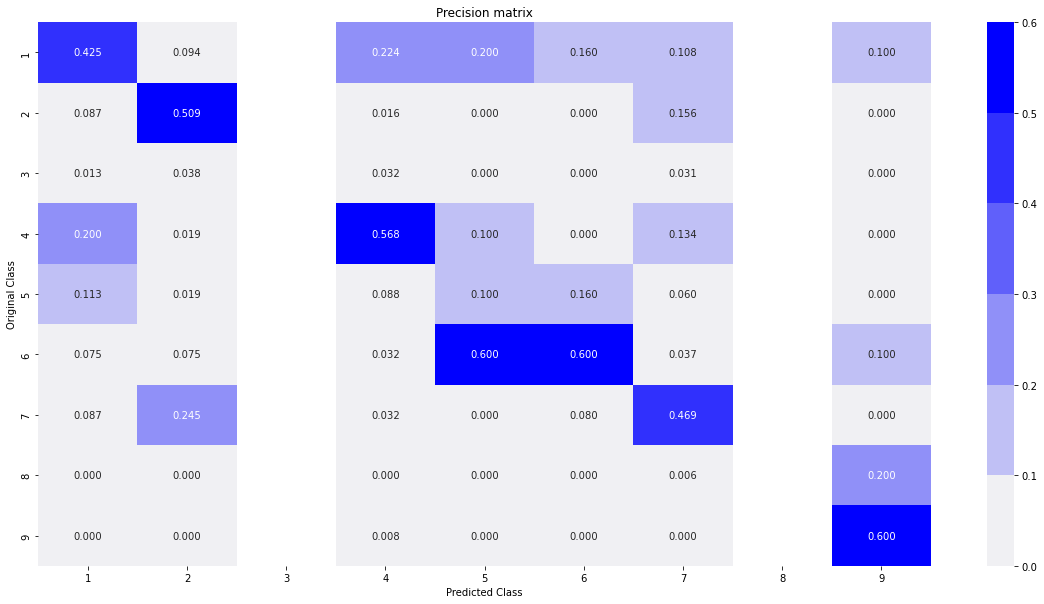

******************************************** Precision matrx ********************************************


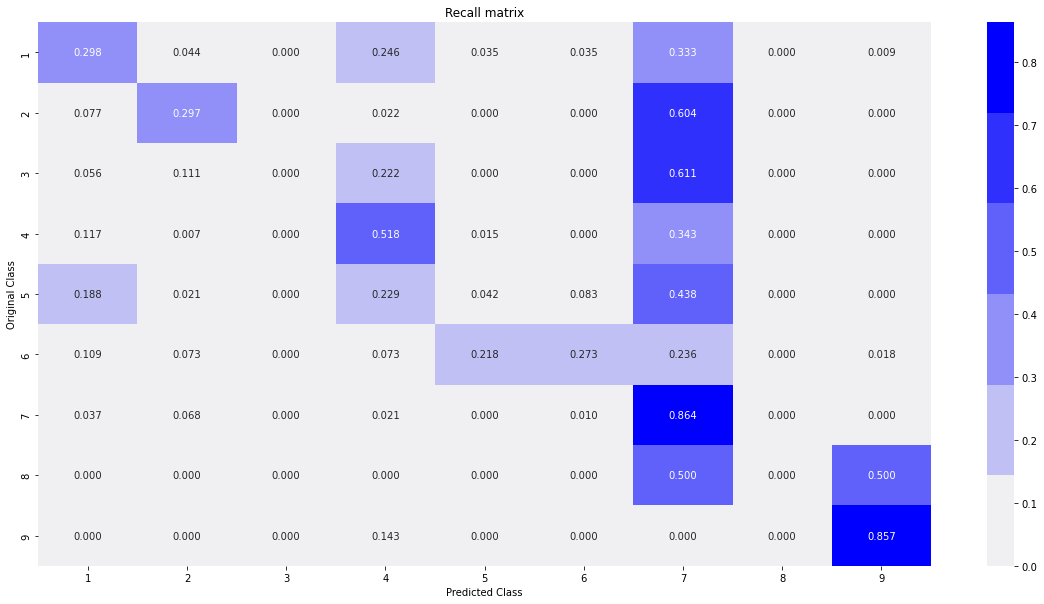

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.547368,0.612030,0.655639,0.663158,0.481203,0.0,0.0
f1_score,0.129392,0.516112,0.589150,0.637583,0.657835,0.440305,0.0,0.0
log_loss,2.470550,1.254855,1.280016,1.035492,1.184624,1.519417,0.0,0.0


In [91]:
dt_clf_one_hot = CalibratedClassifierCV(DecisionTreeClassifier(max_features = 'auto',random_state = 42,class_weight = 'balanced'))
param_grids = {'base_estimator__criterion': ['gini','entropy'],'base_estimator__max_depth' : [15,20,25,30,35,40],'method' : ['sigmoid','isotonic']}
dt_clf_one_hot = GridSearchCV(estimator = dt_clf_one_hot,param_grid = param_grids,cv = 2, scoring = 'neg_log_loss',verbose = 10,return_train_score=True,n_jobs = -1)
dt_clf_one_hot.fit(train_x_onehotCoding,y_train)
print("Best Parameters are : " ,dt_clf_one_hot.best_params_)
metrics(dt_clf_one_hot.best_estimator_,test_x_onehotCoding,test_y,'DT',result_dataset_onehot)
result_dataset_onehot

## Random Forest

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best Parameters are :  {'base_estimator__max_depth': None, 'base_estimator__n_estimators': 60, 'method': 'isotonic'}
accuracy score : 0.5969924812030075
f1 score : 0.5542295769207359
log loss : 1.136225115069775
classification report : 
               precision    recall  f1-score   support

           1       0.56      0.68      0.61       114
           2       0.77      0.33      0.46        91
           3       1.00      0.06      0.11        18
           4       0.64      0.65      0.64       137
           5       0.10      0.04      0.06        48
           6       0.67      0.22      0.33        55
           7       0.60      0.94      0.73       191
           8       0.00      0.00      0.00         4
           9       0.75      0.86      0.80         7

    accuracy                           0.60       665
   macro avg       0.56      0.42      0.42       665
weighted avg       0.60      0.60      0.55       6

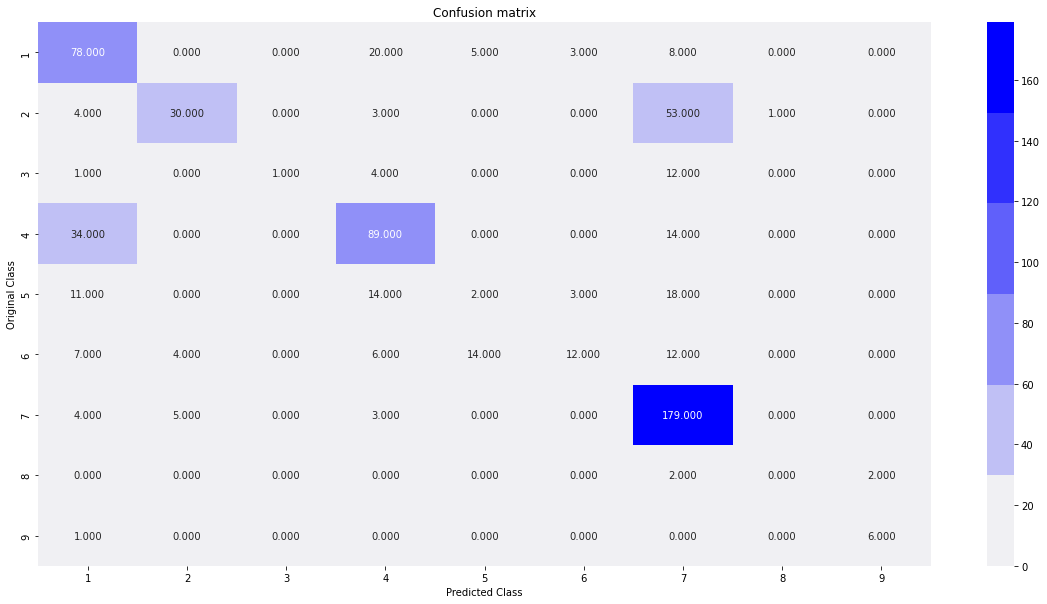

******************************************** Precision matrx ********************************************


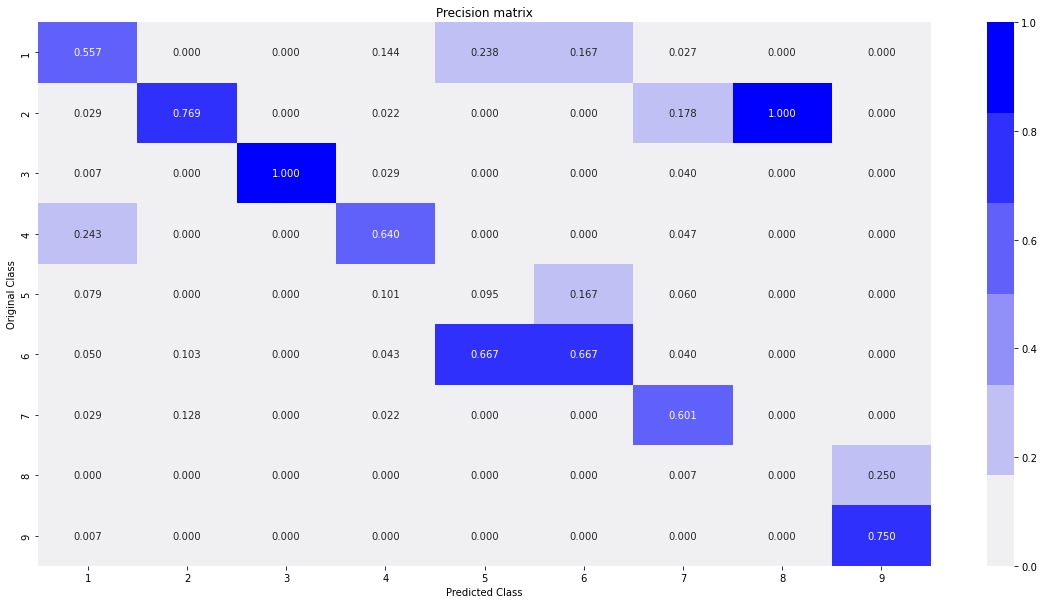

******************************************** Precision matrx ********************************************


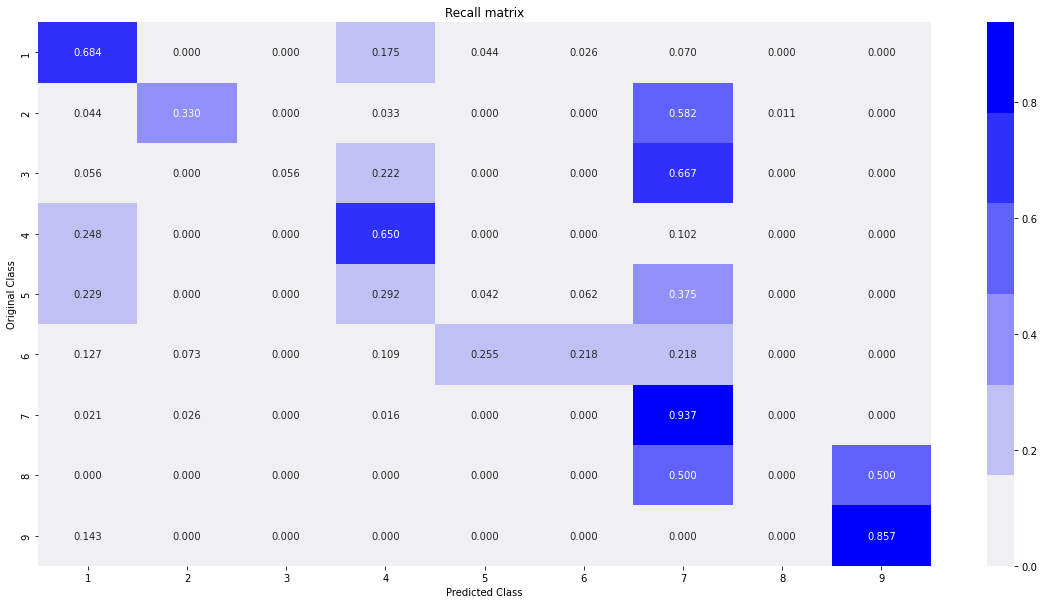

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.547368,0.612030,0.655639,0.663158,0.481203,0.596992,0.0
f1_score,0.129392,0.516112,0.589150,0.637583,0.657835,0.440305,0.554230,0.0
log_loss,2.470550,1.254855,1.280016,1.035492,1.184624,1.519417,1.136225,0.0


[CV 1/2; 1/16] START base_estimator__max_depth=None, base_estimator__n_estimators=60, method=sigmoid
[CV 1/2; 1/16] END base_estimator__max_depth=None, base_estimator__n_estimators=60, method=sigmoid;, score=(train=-0.448, test=-1.180) total time= 1.8min
[CV 1/2; 5/16] START base_estimator__max_depth=None, base_estimator__n_estimators=70, method=sigmoid
[CV 1/2; 5/16] END base_estimator__max_depth=None, base_estimator__n_estimators=70, method=sigmoid;, score=(train=-0.446, test=-1.178) total time= 2.1min
[CV 1/2; 9/16] START base_estimator__max_depth=None, base_estimator__n_estimators=80, method=sigmoid
[CV 1/2; 9/16] END base_estimator__max_depth=None, base_estimator__n_estimators=80, method=sigmoid;, score=(train=-0.441, test=-1.176) total time= 2.5min
[CV 1/2; 13/16] START base_estimator__max_depth=None, base_estimator__n_estimators=90, method=sigmoid
[CV 1/2; 13/16] END base_estimator__max_depth=None, base_estimator__n_estimators=90, method=sigmoid;, score=(train=-0.437, test=-1.17

In [94]:
rf_clf_one_hot = CalibratedClassifierCV(RandomForestClassifier(max_features = 'auto',random_state = 42,class_weight = 'balanced'))
param_grids = {'base_estimator__n_estimators':[60,65,70,75,80,85,90,95],'base_estimator__max_depth' : [None],'method' : ['sigmoid','isotonic']}
rf_clf_one_hot = GridSearchCV(estimator = rf_clf_one_hot,param_grid = param_grids,cv = 2, scoring = 'neg_log_loss',verbose = 10,return_train_score=True,n_jobs= -1)
rf_clf_one_hot.fit(train_x_onehotCoding,y_train)
print("Best Parameters are : " ,rf_clf_one_hot.best_params_)
metrics(rf_clf_one_hot.best_estimator_,test_x_onehotCoding,test_y,'RF',result_dataset_onehot)
result_dataset_onehot



## LightGBM

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2; 1/2] START base_estimator__boosting_type=gbdt, method=sigmoid..........
[CV 1/2; 1/2] END base_estimator__boosting_type=gbdt, method=sigmoid;, score=(train=-0.587, test=-1.162) total time= 1.7min
[CV 2/2; 1/2] START base_estimator__boosting_type=gbdt, method=sigmoid..........
[CV 2/2; 1/2] END base_estimator__boosting_type=gbdt, method=sigmoid;, score=(train=-0.572, test=-1.137) total time= 1.7min
[CV 1/2; 2/2] START base_estimator__boosting_type=gbdt, method=isotonic.........
[CV 1/2; 2/2] END base_estimator__boosting_type=gbdt, method=isotonic;, score=(train=-0.322, test=-1.060) total time= 1.7min
[CV 2/2; 2/2] START base_estimator__boosting_type=gbdt, method=isotonic.........
[CV 2/2; 2/2] END base_estimator__boosting_type=gbdt, method=isotonic;, score=(train=-0.301, test=-1.066) total time= 1.7min
Best Parameters are :  {'base_estimator__boosting_type': 'gbdt', 'method': 'isotonic'}
accuracy score : 0.6195488721804

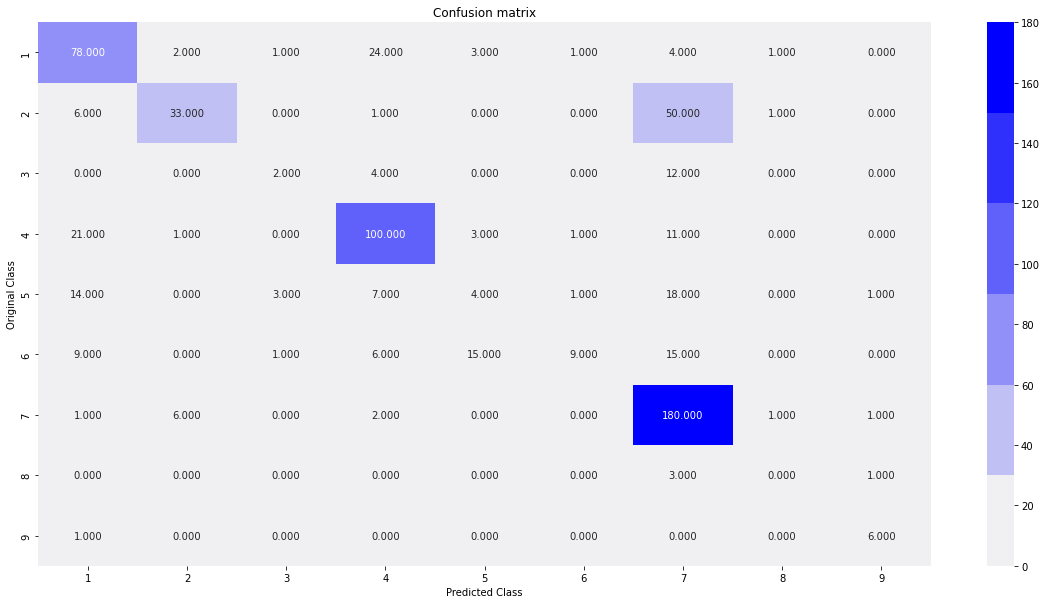

******************************************** Precision matrx ********************************************


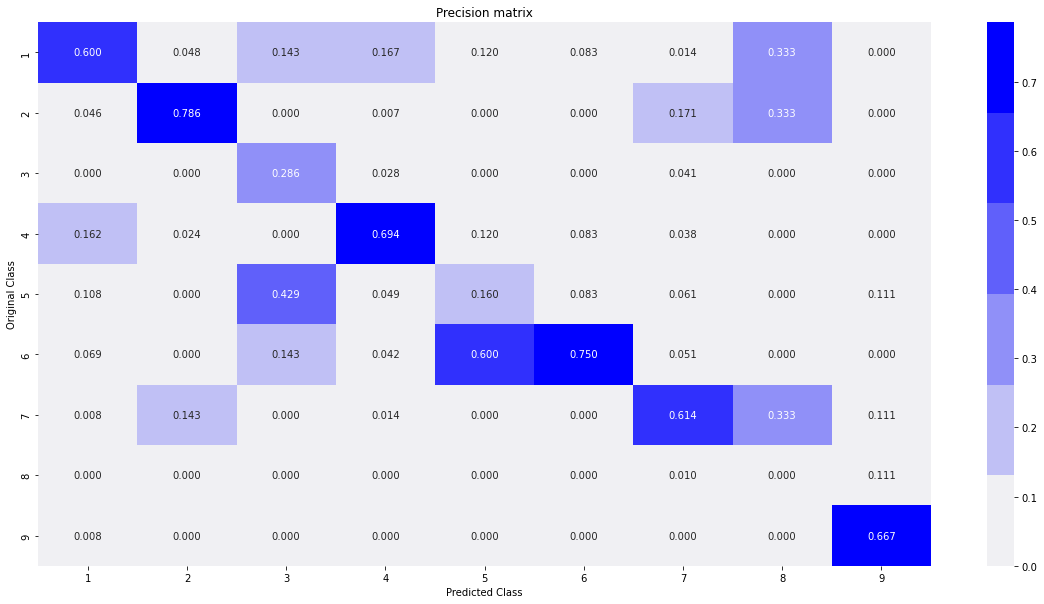

******************************************** Precision matrx ********************************************


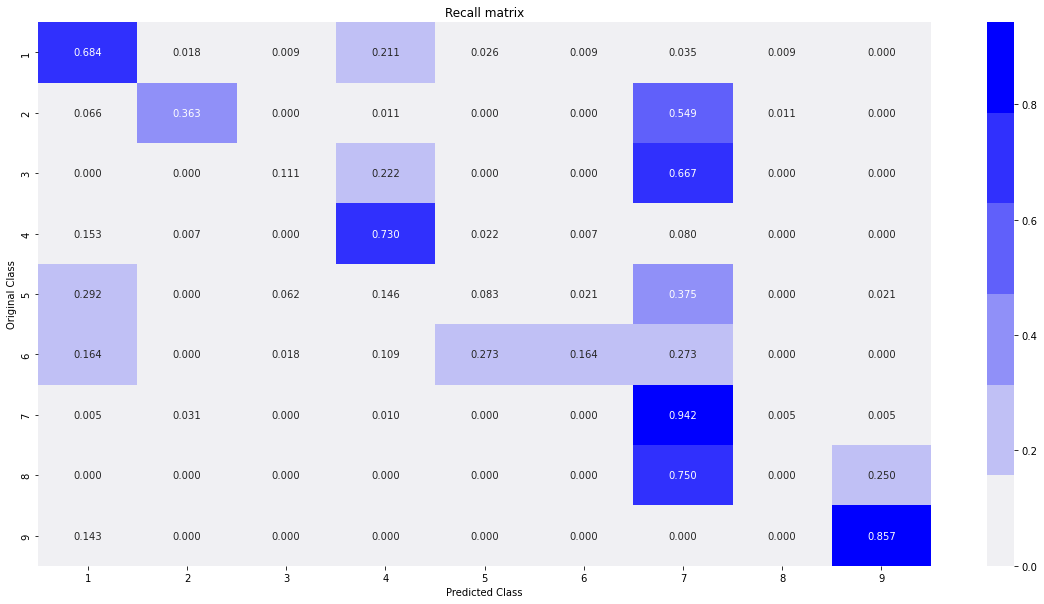

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.547368,0.612030,0.655639,0.663158,0.481203,0.596992,0.619549
f1_score,0.129392,0.516112,0.589150,0.637583,0.657835,0.440305,0.554230,0.580127
log_loss,2.470550,1.254855,1.280016,1.035492,1.184624,1.519417,1.136225,1.125775


In [102]:
from lightgbm import LGBMClassifier
lgbm_clf_one_hot = CalibratedClassifierCV(LGBMClassifier(random_state = 42,class_weight = 'balanced'))
param_grids = {'base_estimator__boosting_type':['gbdt'],'method' : ['sigmoid','isotonic']}
lgbm_clf_one_hot = GridSearchCV(estimator = lgbm_clf_one_hot,param_grid = param_grids,cv = 2, scoring = 'neg_log_loss',verbose = 10,return_train_score=True)
lgbm_clf_one_hot.fit(train_x_onehotCoding,y_train)
print("Best Parameters are : " ,lgbm_clf_one_hot.best_params_)
metrics(lgbm_clf_one_hot.best_estimator_,test_x_onehotCoding,test_y,'XGB',result_dataset_onehot)
result_dataset_onehot

## Results Summary for one hot encoding

In [103]:
result_dataset_onehot

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.547368,0.612030,0.655639,0.663158,0.481203,0.596992,0.619549
f1_score,0.129392,0.516112,0.589150,0.637583,0.657835,0.440305,0.554230,0.580127
log_loss,2.470550,1.254855,1.280016,1.035492,1.184624,1.519417,1.136225,1.125775


# response coding features

## KNN

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Best Parameters are :  {'base_estimator__n_neighbors': 2, 'method': 'isotonic'}
accuracy score : 0.6285714285714286
f1 score : 0.6218758246259606
log loss : 1.2409106792134177
classification report : 
               precision    recall  f1-score   support

           1       0.55      0.72      0.63       114
           2       0.53      0.56      0.55        91
           3       0.50      0.17      0.25        18
           4       0.72      0.66      0.69       137
           5       0.42      0.33      0.37        48
           6       0.70      0.60      0.65        55
           7       0.70      0.72      0.71       191
           8       0.00      0.00      0.00         4
           9       0.75      0.86      0.80         7

    accuracy                           0.63       665
   macro avg       0.54      0.51      0.51       665
weighted avg       0.63      0.63      0.62       665

********************************

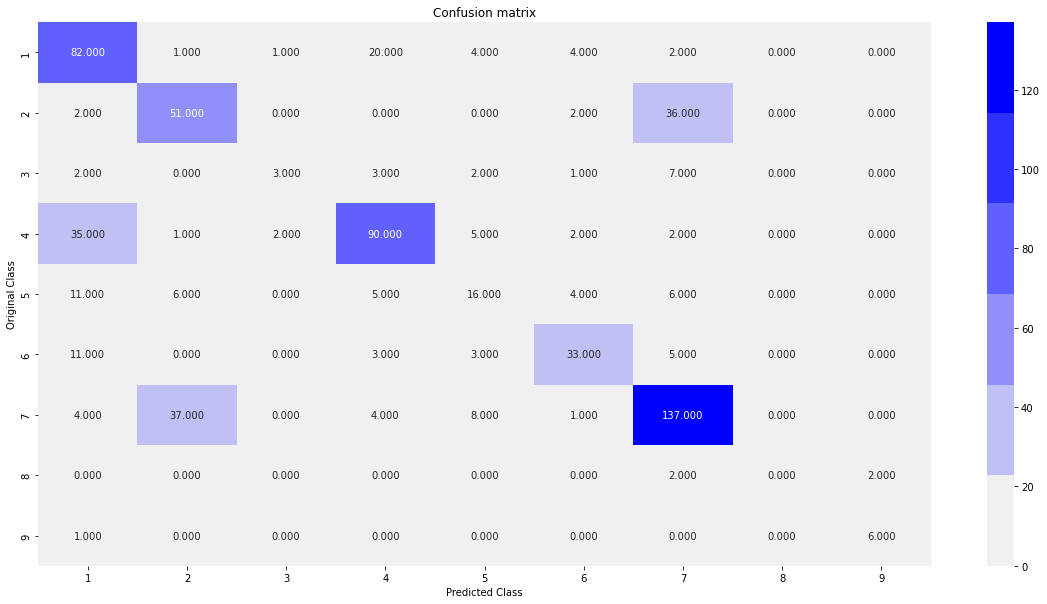

******************************************** Precision matrx ********************************************


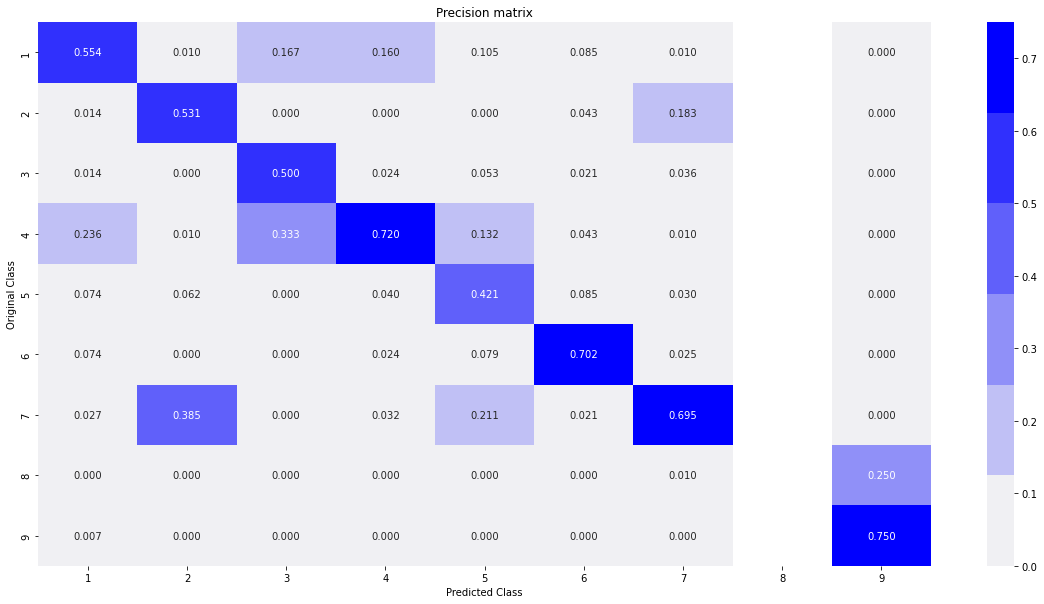

******************************************** Precision matrx ********************************************


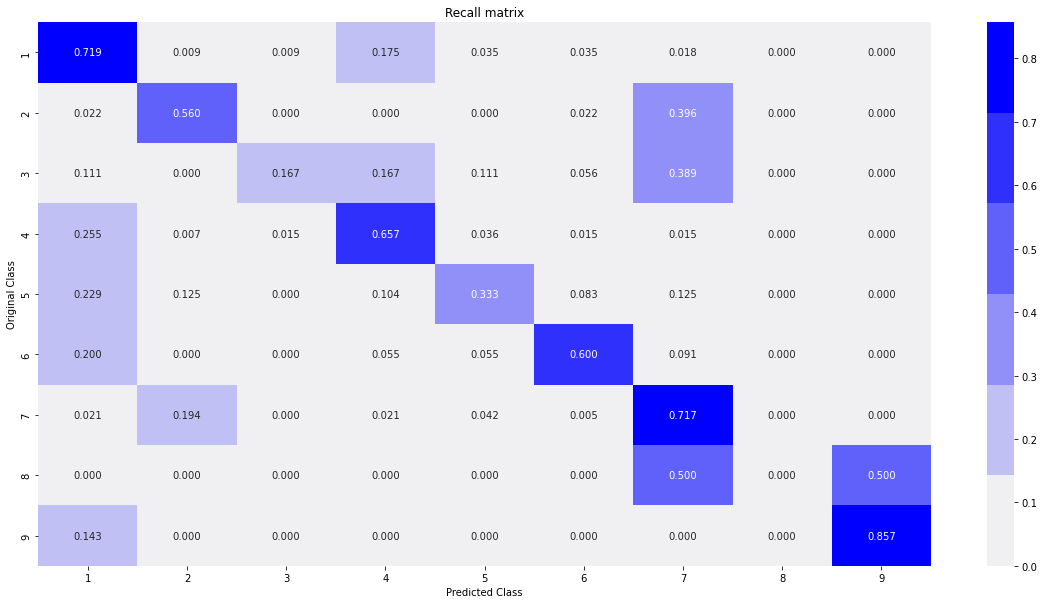

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.628571,0.0,0.0,0.0,0.0,0.0,0.0
f1_score,0.129392,0.621876,0.0,0.0,0.0,0.0,0.0,0.0
log_loss,2.470550,1.240911,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
knn_clf_response = CalibratedClassifierCV(KNeighborsClassifier())
param_grids_response = {'base_estimator__n_neighbors' : [1,2,3,4,5,6,7],'method' : ['sigmoid','isotonic']}
knn_clf_response = GridSearchCV(estimator = knn_clf_response,param_grid = param_grids_response,cv = 3, scoring = 'neg_log_loss',verbose = 10,return_train_score=True,n_jobs = 5)
knn_clf_response.fit(train_x_responseCoding,y_train)
knn_clf_response.best_estimator_
print("Best Parameters are : " ,knn_clf_response.best_params_)
metrics(knn_clf_response.best_estimator_,test_x_responseCoding,test_y,'KNN',result_dataset_response_coding)
result_dataset_response_coding

### Naive Bayes

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters are :  {'base_estimator__var_smoothing': 0.0001, 'method': 'isotonic'}
accuracy score : 0.5759398496240602
f1 score : 0.5380582210974767
log loss : 1.4474926881844499
classification report : 
               precision    recall  f1-score   support

           1       0.45      0.69      0.55       114
           2       0.59      0.46      0.52        91
           3       0.00      0.00      0.00        18
           4       0.68      0.50      0.58       137
           5       0.00      0.00      0.00        48
           6       0.49      0.49      0.49        55
           7       0.65      0.87      0.74       191
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         7

    accuracy                           0.58       665
   macro avg       0.32      0.34      0.32       665
weighted avg       0.53      0.58      0.54       665

*************************

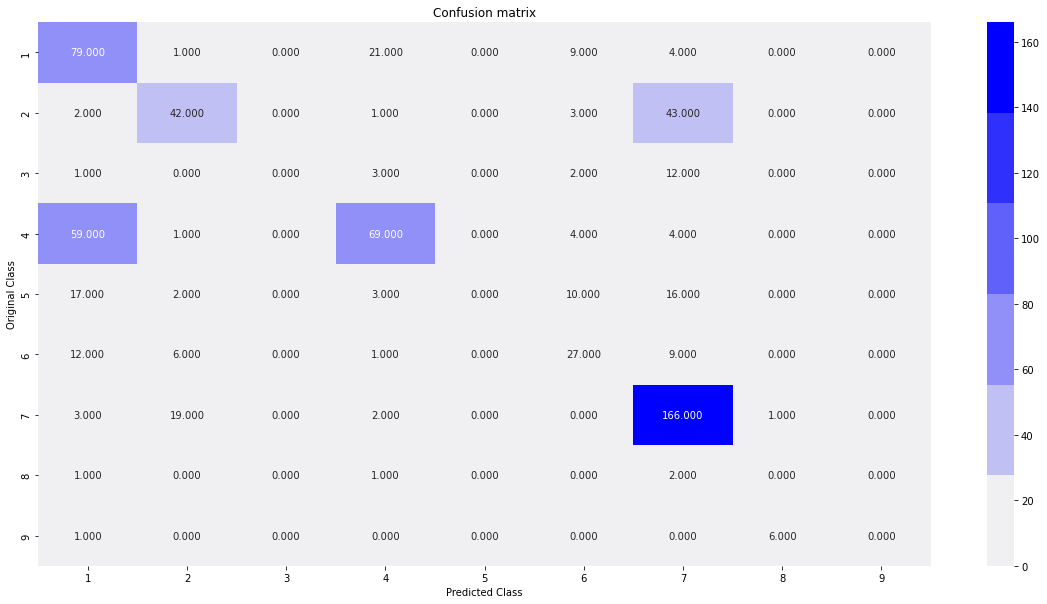

******************************************** Precision matrx ********************************************


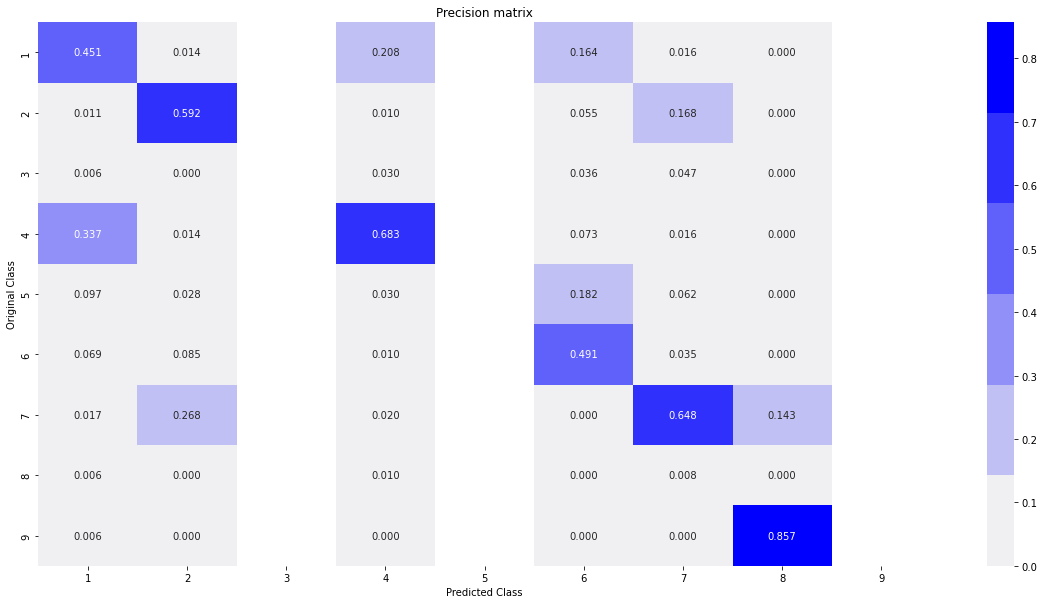

******************************************** Precision matrx ********************************************


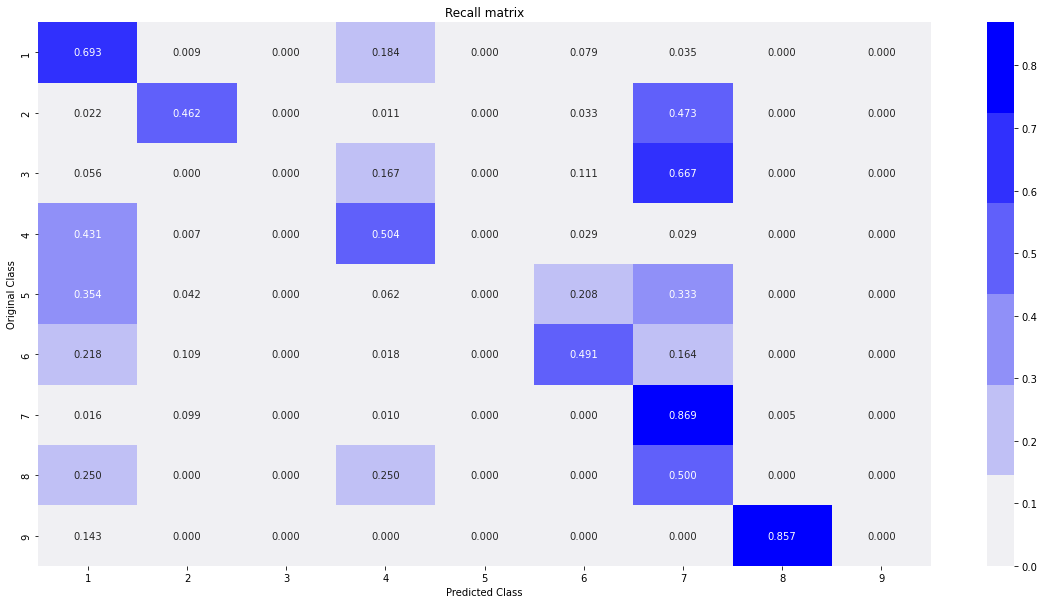

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.628571,0.575940,0.0,0.0,0.0,0.0,0.0
f1_score,0.129392,0.621876,0.538058,0.0,0.0,0.0,0.0,0.0
log_loss,2.470550,1.240911,1.447493,0.0,0.0,0.0,0.0,0.0


In [110]:
from sklearn.naive_bayes import GaussianNB
naive_clf_response =CalibratedClassifierCV(GaussianNB())
param_grids = {'base_estimator__var_smoothing' :  [0.00001, 0.0001, 0.001, 0.1, 1, 10],'method' : ['sigmoid','isotonic']}
naive_clf_response = GridSearchCV(estimator = naive_clf_response,param_grid = param_grids,cv = 3, scoring = 'neg_log_loss',verbose = 10,return_train_score=True,n_jobs = 4)
naive_clf_response.fit(train_x_responseCoding,y_train)
print("Best Parameters are : " ,naive_clf_response.best_params_)
metrics(naive_clf_response.best_estimator_,test_x_responseCoding,test_y,'NB',result_dataset_response_coding)
result_dataset_response_coding

### Logistic Regression

Fitting 3 folds for each of 66 candidates, totalling 198 fits
Best Parameters are :  {'base_estimator__alpha': 1e-06, 'base_estimator__penalty': 'l1', 'method': 'isotonic'}
accuracy score : 0.5819548872180451
f1 score : 0.5619423773776865
log loss : 3.443405368029621
classification report : 
               precision    recall  f1-score   support

           1       0.46      0.88      0.61       114
           2       0.58      0.47      0.52        91
           3       0.32      0.44      0.37        18
           4       0.80      0.43      0.56       137
           5       0.38      0.06      0.11        48
           6       0.57      0.49      0.53        55
           7       0.67      0.74      0.70       191
           8       0.00      0.00      0.00         4
           9       0.60      0.86      0.71         7

    accuracy                           0.58       665
   macro avg       0.49      0.49      0.46       665
weighted avg       0.61      0.58      0.56       665

*

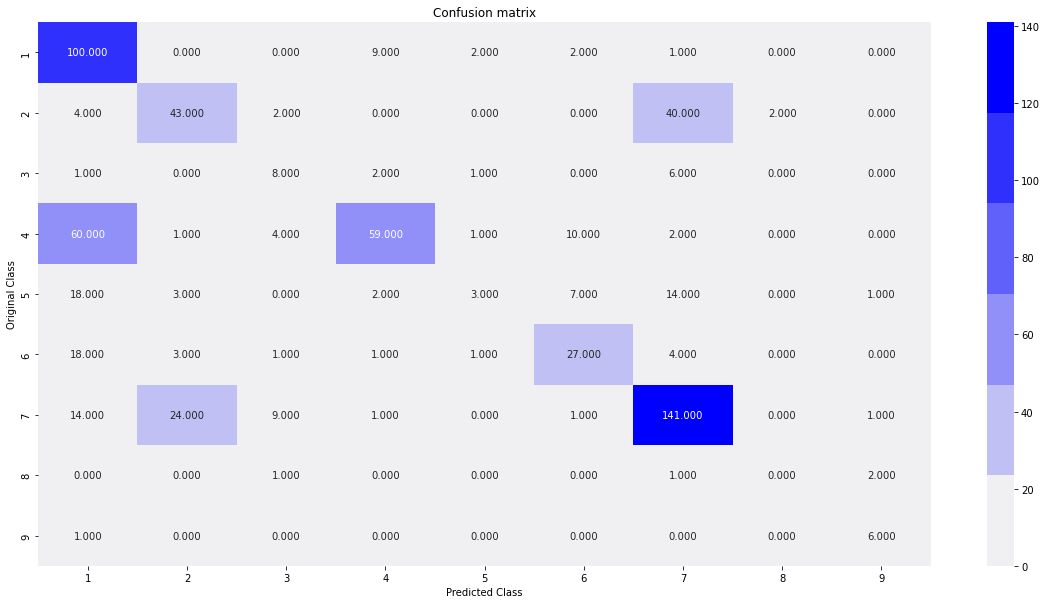

******************************************** Precision matrx ********************************************


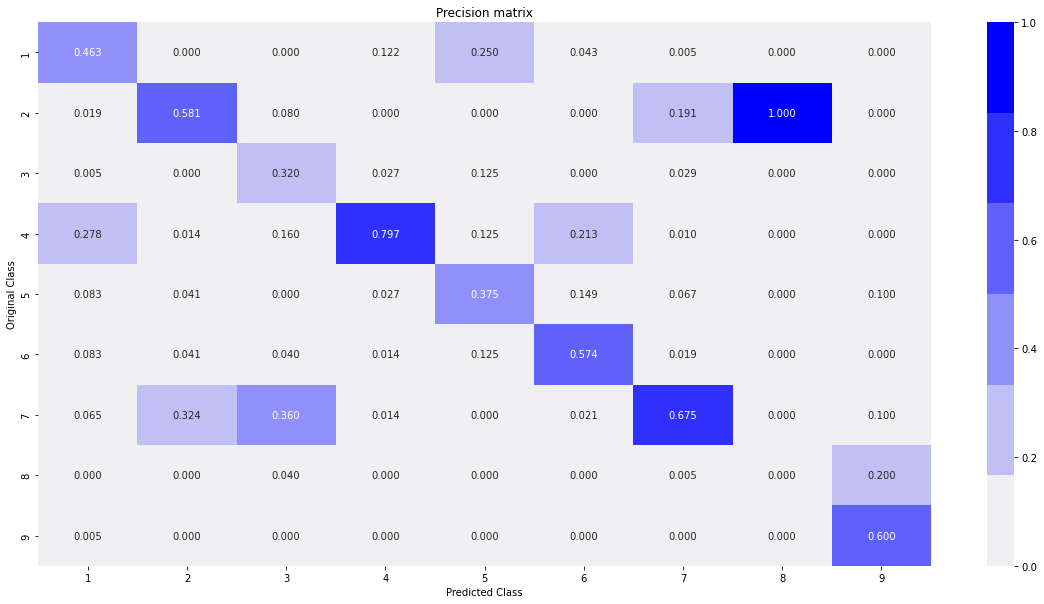

******************************************** Precision matrx ********************************************


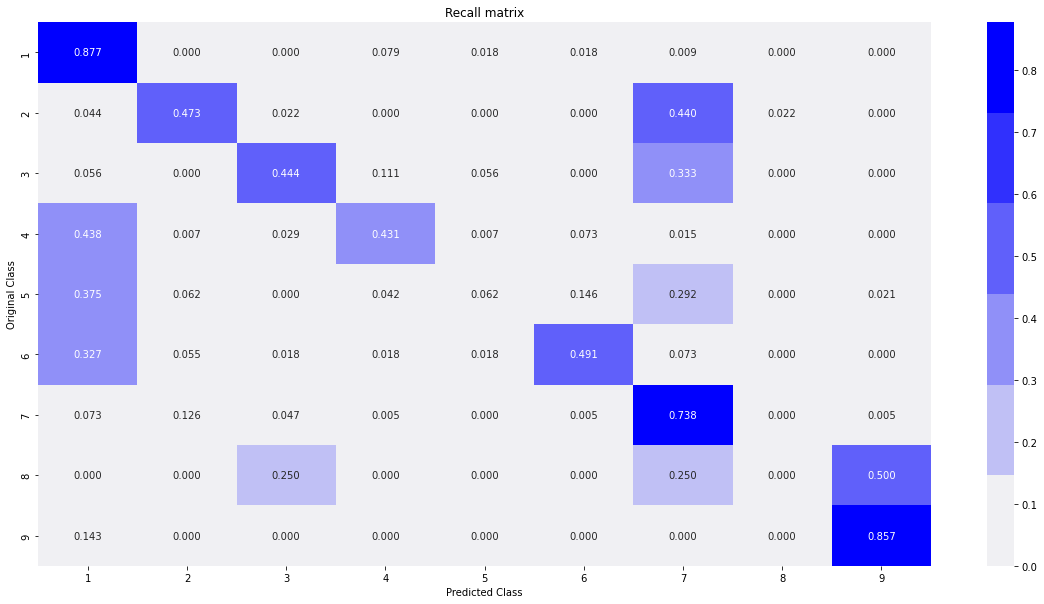

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.628571,0.575940,0.581955,0.0,0.0,0.0,0.0
f1_score,0.129392,0.621876,0.538058,0.561942,0.0,0.0,0.0,0.0
log_loss,2.470550,1.240911,1.447493,3.443405,0.0,0.0,0.0,0.0


[CV 1/3; 2/12] START base_estimator__var_smoothing=1e-05, method=isotonic.......
[CV 1/3; 2/12] END base_estimator__var_smoothing=1e-05, method=isotonic;, score=(train=-0.499, test=-0.646) total time=   0.0s
[CV 2/3; 2/12] START base_estimator__var_smoothing=1e-05, method=isotonic.......
[CV 2/3; 2/12] END base_estimator__var_smoothing=1e-05, method=isotonic;, score=(train=-0.532, test=-0.581) total time=   0.1s
[CV 3/3; 3/12] START base_estimator__var_smoothing=0.0001, method=sigmoid.......
[CV 3/3; 3/12] END base_estimator__var_smoothing=0.0001, method=sigmoid;, score=(train=-0.943, test=-0.949) total time=   0.2s
[CV 2/3; 5/12] START base_estimator__var_smoothing=0.001, method=sigmoid........
[CV 2/3; 5/12] END base_estimator__var_smoothing=0.001, method=sigmoid;, score=(train=-1.094, test=-1.078) total time=   0.1s
[CV 3/3; 6/12] START base_estimator__var_smoothing=0.001, method=isotonic.......
[CV 3/3; 6/12] END base_estimator__var_smoothing=0.001, method=isotonic;, score=(train=-

[CV 3/3; 1/12] START base_estimator__var_smoothing=1e-05, method=sigmoid........
[CV 3/3; 1/12] END base_estimator__var_smoothing=1e-05, method=sigmoid;, score=(train=-0.934, test=-0.940) total time=   0.1s
[CV 3/3; 2/12] START base_estimator__var_smoothing=1e-05, method=isotonic.......
[CV 3/3; 2/12] END base_estimator__var_smoothing=1e-05, method=isotonic;, score=(train=-0.598, test=-0.585) total time=   0.1s
[CV 1/3; 4/12] START base_estimator__var_smoothing=0.0001, method=isotonic......
[CV 1/3; 4/12] END base_estimator__var_smoothing=0.0001, method=isotonic;, score=(train=-0.488, test=-0.636) total time=   0.1s
[CV 3/3; 4/12] START base_estimator__var_smoothing=0.0001, method=isotonic......
[CV 3/3; 4/12] END base_estimator__var_smoothing=0.0001, method=isotonic;, score=(train=-0.590, test=-0.576) total time=   0.1s
[CV 1/3; 6/12] START base_estimator__var_smoothing=0.001, method=isotonic.......
[CV 1/3; 6/12] END base_estimator__var_smoothing=0.001, method=isotonic;, score=(train

In [112]:
logistic_clf_response =CalibratedClassifierCV(SGDClassifier(loss = 'log',class_weight = 'balanced'))
param_grids = {'base_estimator__alpha' :  [10 ** x for x in range(-10, 1)],'base_estimator__penalty' : ['l1','l2','elasticnet'],'method' : ['sigmoid','isotonic']}
logistic_clf_response = GridSearchCV(estimator = logistic_clf_response,param_grid = param_grids,cv = 3, scoring = 'neg_log_loss',verbose = 10,return_train_score=True,n_jobs = 4)
logistic_clf_response.fit(train_x_responseCoding,y_train)
print("Best Parameters are : " ,logistic_clf_response.best_params_)
metrics(logistic_clf_response.best_estimator_,test_x_responseCoding,test_y,'LR',result_dataset_response_coding)
result_dataset_response_coding

## Decision Trees

Fitting 2 folds for each of 32 candidates, totalling 64 fits
Best Parameters are :  {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 15, 'method': 'isotonic'}
accuracy score : 0.44360902255639095
f1 score : 0.3946607145187753
log loss : 2.3157386650858838
classification report : 
               precision    recall  f1-score   support

           1       0.37      0.39      0.38       114
           2       0.43      0.32      0.36        91
           3       0.00      0.00      0.00        18
           4       0.38      0.85      0.53       137
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        55
           7       0.62      0.52      0.57       191
           8       0.00      0.00      0.00         4
           9       1.00      0.57      0.73         7

    accuracy                           0.44       665
   macro avg       0.31      0.30      0.29       665
weighted avg       0.39      0.44      0.39    

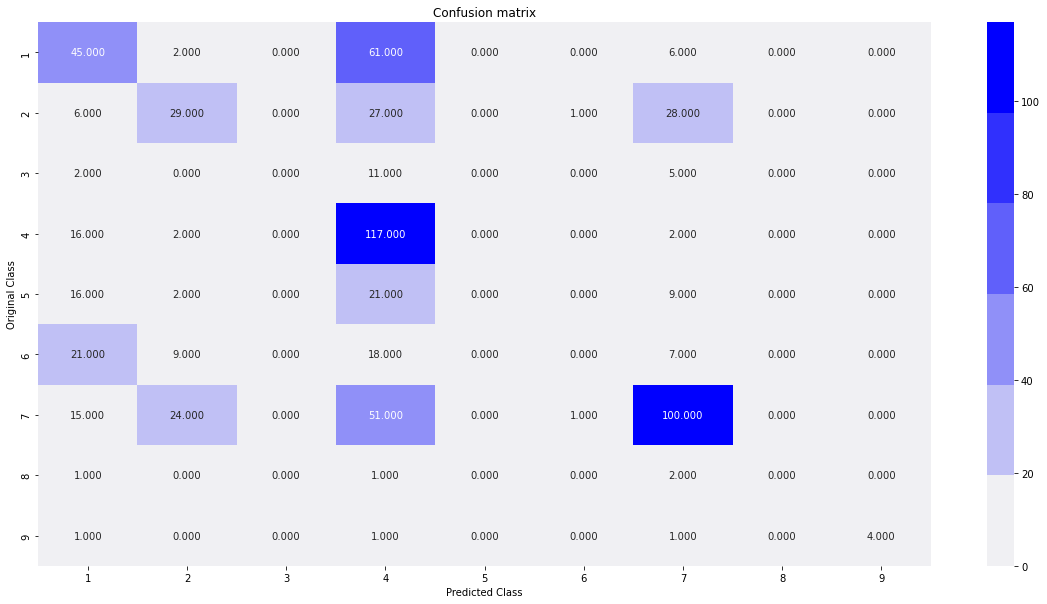

******************************************** Precision matrx ********************************************


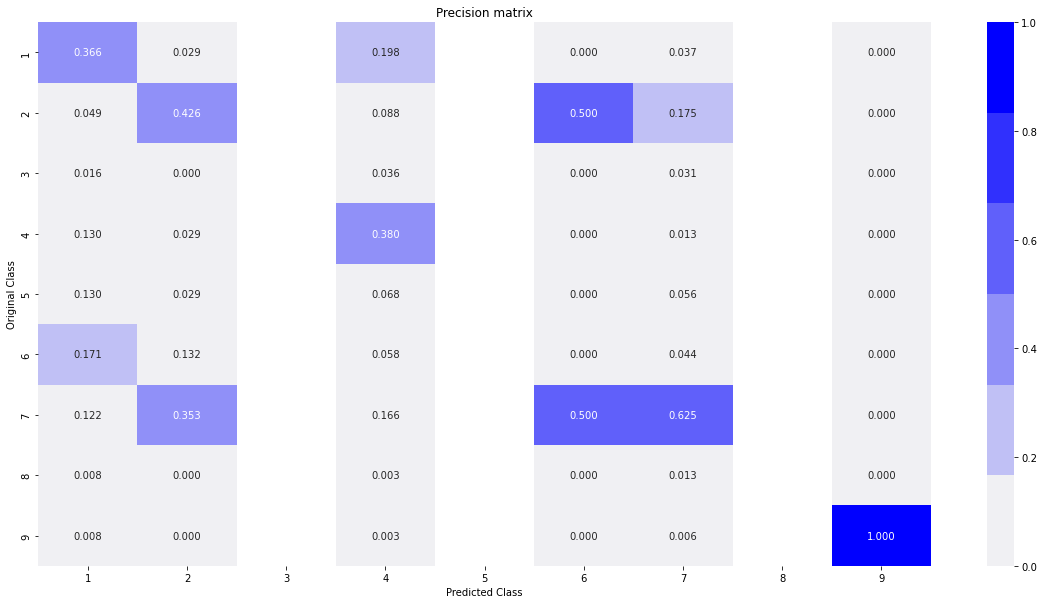

******************************************** Precision matrx ********************************************


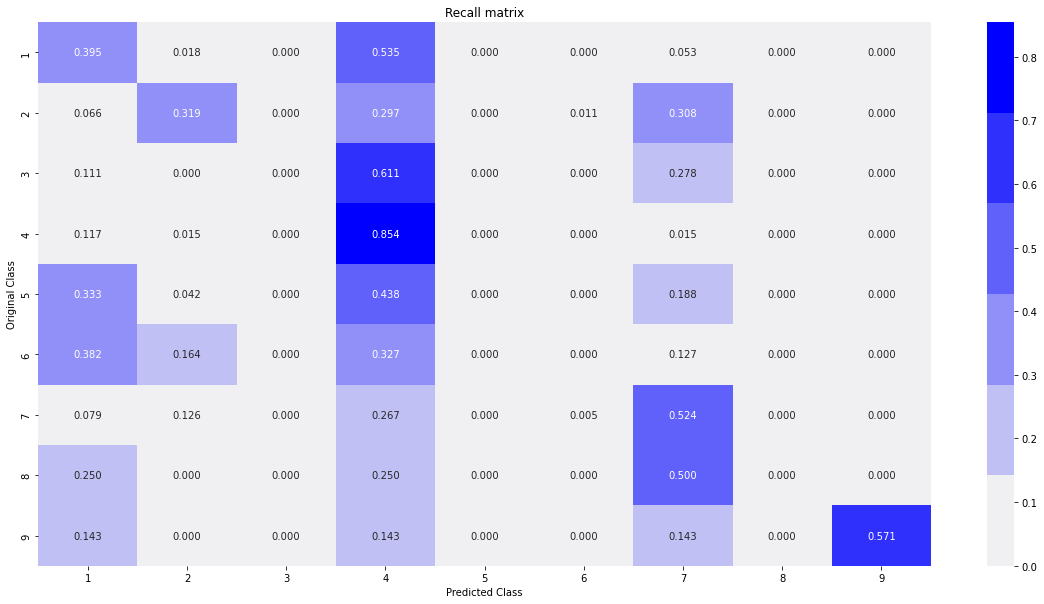

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.628571,0.575940,0.581955,0.0,0.443609,0.0,0.0
f1_score,0.129392,0.621876,0.538058,0.561942,0.0,0.394661,0.0,0.0
log_loss,2.470550,1.240911,1.447493,3.443405,0.0,2.315739,0.0,0.0


[CV 2/2; 3/24] START base_estimator__criterion=gini, base_estimator__max_depth=20, method=sigmoid
[CV 2/2; 3/24] END base_estimator__criterion=gini, base_estimator__max_depth=20, method=sigmoid;, score=(train=-0.118, test=-0.205) total time=   0.2s
[CV 2/2; 8/24] START base_estimator__criterion=gini, base_estimator__max_depth=30, method=isotonic
[CV 2/2; 8/24] END base_estimator__criterion=gini, base_estimator__max_depth=30, method=isotonic;, score=(train=-0.084, test=-0.175) total time=   0.1s
[CV 1/2; 11/24] START base_estimator__criterion=gini, base_estimator__max_depth=40, method=sigmoid
[CV 1/2; 11/24] END base_estimator__criterion=gini, base_estimator__max_depth=40, method=sigmoid;, score=(train=-0.109, test=-0.211) total time=   0.2s
[CV 2/2; 16/24] START base_estimator__criterion=entropy, base_estimator__max_depth=20, method=isotonic
[CV 2/2; 16/24] END base_estimator__criterion=entropy, base_estimator__max_depth=20, method=isotonic;, score=(train=-0.081, test=-0.166) total tim

[CV 1/2; 3/24] START base_estimator__criterion=gini, base_estimator__max_depth=20, method=sigmoid
[CV 1/2; 3/24] END base_estimator__criterion=gini, base_estimator__max_depth=20, method=sigmoid;, score=(train=-0.109, test=-0.211) total time=   0.2s
[CV 1/2; 9/24] START base_estimator__criterion=gini, base_estimator__max_depth=35, method=sigmoid
[CV 1/2; 9/24] END base_estimator__criterion=gini, base_estimator__max_depth=35, method=sigmoid;, score=(train=-0.109, test=-0.211) total time=   0.2s
[CV 2/2; 13/24] START base_estimator__criterion=entropy, base_estimator__max_depth=15, method=sigmoid
[CV 2/2; 13/24] END base_estimator__criterion=entropy, base_estimator__max_depth=15, method=sigmoid;, score=(train=-0.114, test=-0.196) total time=   0.2s
[CV 1/2; 19/24] START base_estimator__criterion=entropy, base_estimator__max_depth=30, method=sigmoid
[CV 1/2; 19/24] END base_estimator__criterion=entropy, base_estimator__max_depth=30, method=sigmoid;, score=(train=-0.127, test=-0.232) total t

[CV 2/2; 1/24] START base_estimator__criterion=gini, base_estimator__max_depth=15, method=sigmoid
[CV 2/2; 1/24] END base_estimator__criterion=gini, base_estimator__max_depth=15, method=sigmoid;, score=(train=-0.118, test=-0.205) total time=   0.2s
[CV 2/2; 9/24] START base_estimator__criterion=gini, base_estimator__max_depth=35, method=sigmoid
[CV 2/2; 9/24] END base_estimator__criterion=gini, base_estimator__max_depth=35, method=sigmoid;, score=(train=-0.118, test=-0.205) total time=   0.2s
[CV 2/2; 14/24] START base_estimator__criterion=entropy, base_estimator__max_depth=15, method=isotonic
[CV 2/2; 14/24] END base_estimator__criterion=entropy, base_estimator__max_depth=15, method=isotonic;, score=(train=-0.081, test=-0.166) total time=   0.1s
[CV 2/2; 17/24] START base_estimator__criterion=entropy, base_estimator__max_depth=25, method=sigmoid
[CV 2/2; 17/24] END base_estimator__criterion=entropy, base_estimator__max_depth=25, method=sigmoid;, score=(train=-0.114, test=-0.196) total

[CV 1/2; 4/24] START base_estimator__criterion=gini, base_estimator__max_depth=20, method=isotonic
[CV 1/2; 4/24] END base_estimator__criterion=gini, base_estimator__max_depth=20, method=isotonic;, score=(train=-0.075, test=-0.203) total time=   0.1s
[CV 2/2; 5/24] START base_estimator__criterion=gini, base_estimator__max_depth=25, method=sigmoid
[CV 2/2; 5/24] END base_estimator__criterion=gini, base_estimator__max_depth=25, method=sigmoid;, score=(train=-0.118, test=-0.205) total time=   0.2s
[CV 2/2; 11/24] START base_estimator__criterion=gini, base_estimator__max_depth=40, method=sigmoid
[CV 2/2; 11/24] END base_estimator__criterion=gini, base_estimator__max_depth=40, method=sigmoid;, score=(train=-0.118, test=-0.205) total time=   0.2s
[CV 1/2; 16/24] START base_estimator__criterion=entropy, base_estimator__max_depth=20, method=isotonic
[CV 1/2; 16/24] END base_estimator__criterion=entropy, base_estimator__max_depth=20, method=isotonic;, score=(train=-0.088, test=-0.220) total tim

In [115]:
dt_clf_response = CalibratedClassifierCV(DecisionTreeClassifier(max_features = 'auto',random_state = 42,class_weight = 'balanced'))
param_grids = {'base_estimator__criterion': ['gini','entropy'],'base_estimator__max_depth' : [4,5,9,11,13,15,16,17],'method' : ['sigmoid','isotonic']}
dt_clf_response = GridSearchCV(estimator = dt_clf_response,param_grid = param_grids,cv = 2, scoring = 'neg_log_loss',verbose = 10,return_train_score=True,n_jobs = -1)
dt_clf_response.fit(train_x_responseCoding,y_train)
print("Best Parameters are : " ,dt_clf_response.best_params_)
metrics(dt_clf_response.best_estimator_,test_x_responseCoding,test_y,'DT',result_dataset_response_coding)
result_dataset_response_coding

## SVC

Fitting 2 folds for each of 40 candidates, totalling 80 fits
Best Parameters are :  {'base_estimator__C': 140.0, 'base_estimator__kernel': 'poly', 'method': 'isotonic'}
accuracy score : 0.4766917293233083
f1 score : 0.45924227372267284
log loss : 2.221885203975809
classification report : 
               precision    recall  f1-score   support

           1       0.43      0.64      0.52       114
           2       0.36      0.55      0.43        91
           3       0.30      0.72      0.42        18
           4       0.54      0.14      0.22       137
           5       0.34      0.21      0.26        48
           6       0.61      0.45      0.52        55
           7       0.65      0.63      0.64       191
           8       0.00      0.00      0.00         4
           9       0.75      0.86      0.80         7

    accuracy                           0.48       665
   macro avg       0.44      0.47      0.42       665
weighted avg       0.51      0.48      0.46       665

****

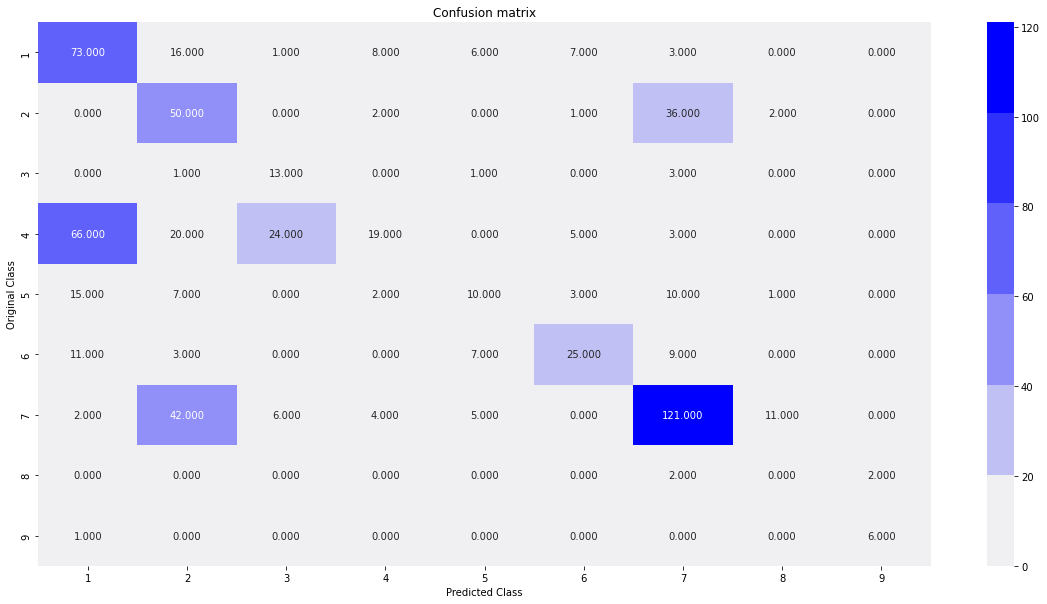

******************************************** Precision matrx ********************************************


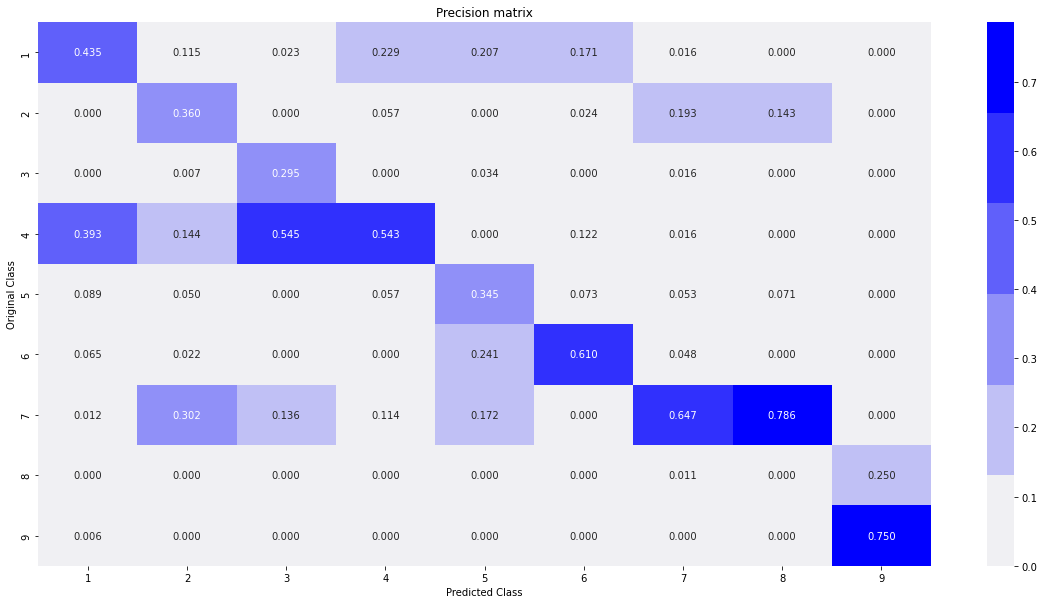

******************************************** Precision matrx ********************************************


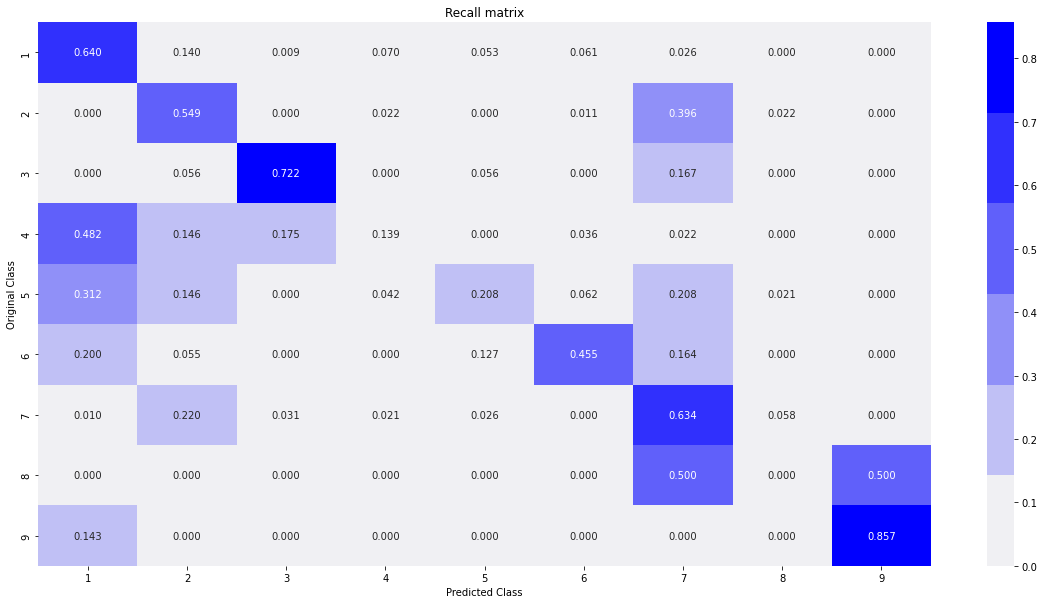

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.628571,0.575940,0.581955,0.476692,0.443609,0.0,0.0
f1_score,0.129392,0.621876,0.538058,0.561942,0.459242,0.394661,0.0,0.0
log_loss,2.470550,1.240911,1.447493,3.443405,2.221885,2.315739,0.0,0.0


In [121]:
svc_clf_response =CalibratedClassifierCV(SVC(random_state = 42,class_weight = 'balanced'))
param_grids = {'base_estimator__kernel':['linear', 'poly', 'rbf', 'sigmoid'],'base_estimator__C' :  [100.0,120.0,140.0,160.0,180.0],'method' : ['sigmoid','isotonic']}
svc_clf_response = GridSearchCV(estimator = svc_clf_response,param_grid = param_grids,cv = 2, scoring = 'neg_log_loss',verbose = 10,return_train_score=True,n_jobs = 4)
svc_clf_response.fit(train_x_responseCoding,train_y)
print("Best Parameters are : " ,svc_clf_response.best_params_)
metrics(svc_clf_response.best_estimator_,test_x_responseCoding,test_y,'SVC',result_dataset_response_coding)
result_dataset_response_coding

### Decision Trees

[CV 2/2; 2/40] START base_estimator__C=0.001, base_estimator__kernel=linear, method=isotonic
[CV 2/2; 2/40] END base_estimator__C=0.001, base_estimator__kernel=linear, method=isotonic;, score=(train=-1.033, test=-1.195) total time=   1.9s
[CV 1/2; 3/40] START base_estimator__C=0.001, base_estimator__kernel=poly, method=sigmoid
[CV 1/2; 3/40] END base_estimator__C=0.001, base_estimator__kernel=poly, method=sigmoid;, score=(train=-1.203, test=-1.224) total time=   1.9s
[CV 1/2; 5/40] START base_estimator__C=0.001, base_estimator__kernel=rbf, method=sigmoid
[CV 1/2; 5/40] END base_estimator__C=0.001, base_estimator__kernel=rbf, method=sigmoid;, score=(train=-1.258, test=-1.274) total time=   3.2s
[CV 1/2; 7/40] START base_estimator__C=0.001, base_estimator__kernel=sigmoid, method=sigmoid
[CV 1/2; 7/40] END base_estimator__C=0.001, base_estimator__kernel=sigmoid, method=sigmoid;, score=(train=-1.414, test=-1.414) total time=   3.1s
[CV 2/2; 9/40] START base_estimator__C=0.01, base_estimato

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best Parameters are :  {'base_estimator__max_depth': None, 'base_estimator__n_estimators': 90, 'method': 'isotonic'}
accuracy score : 0.324812030075188
f1 score : 0.27413607582165406
log loss : 2.462832482921158
classification report : 
               precision    recall  f1-score   support

           1       0.36      0.84      0.51       114
           2       0.73      0.09      0.16        91
           3       0.27      0.50      0.35        18
           4       0.20      0.42      0.27       137
           5       0.00      0.00      0.00        48
           6       0.67      0.33      0.44        55
           7       0.66      0.11      0.19       191
           8       0.33      0.25      0.29         4
           9       0.71      0.71      0.71         7

    accuracy                           0.32       665
   macro avg       0.44      0.36      0.32       665
weighted avg       0.46      0.32      0.27       6

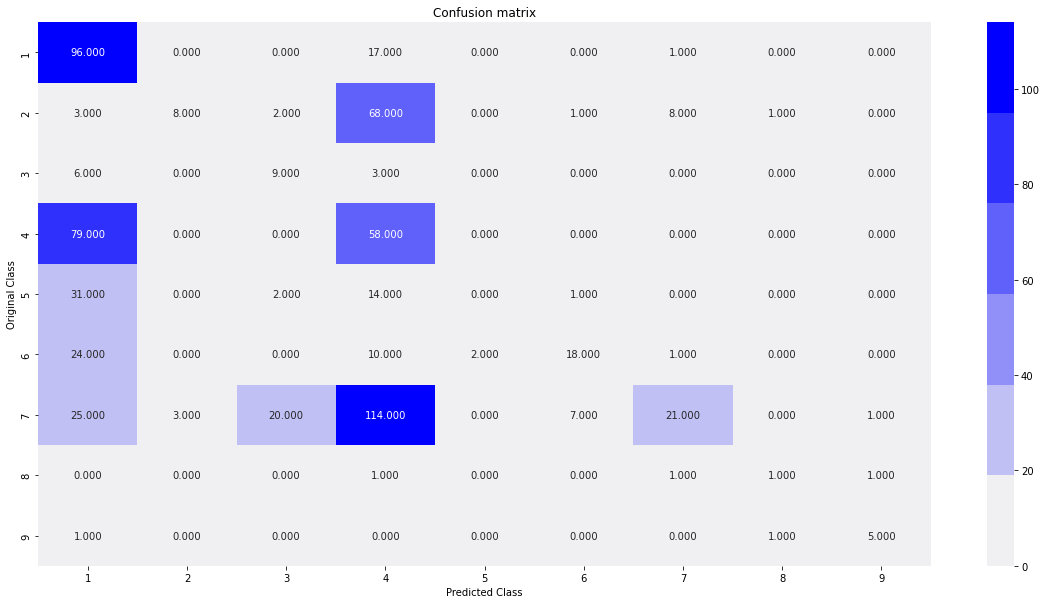

******************************************** Precision matrx ********************************************


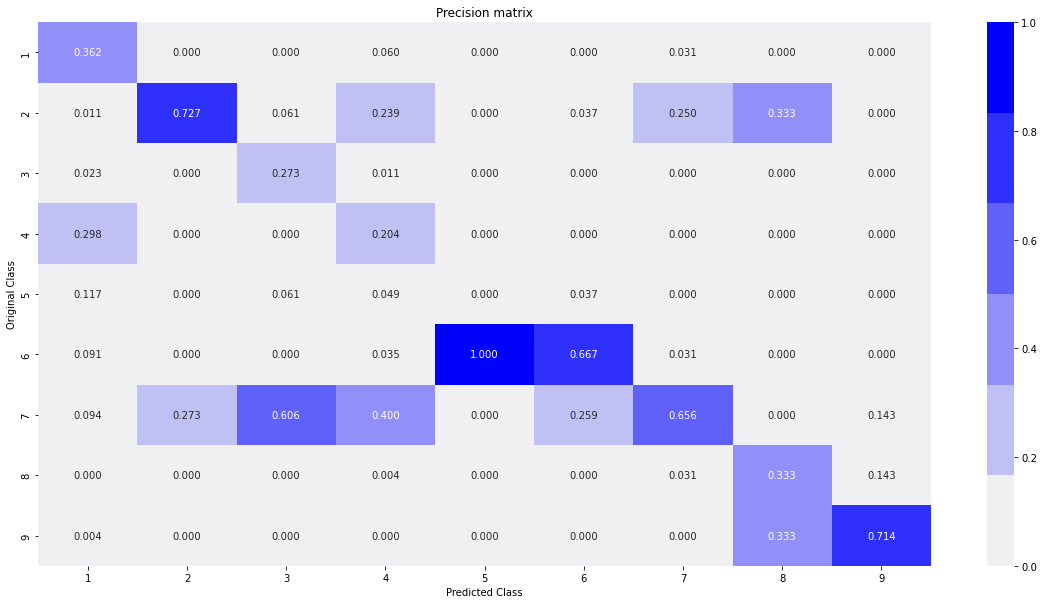

******************************************** Precision matrx ********************************************


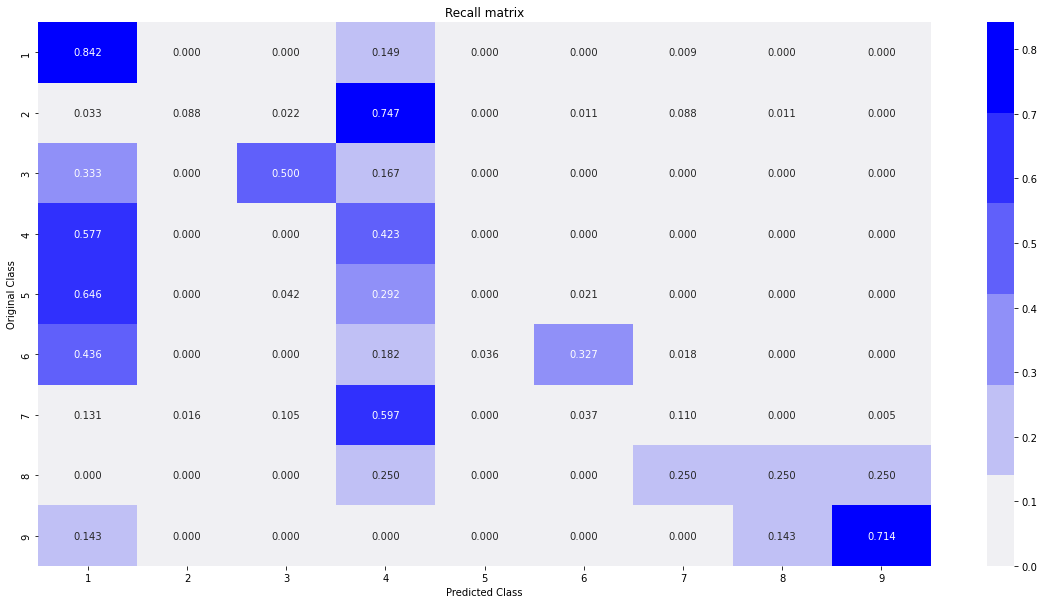

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.628571,0.575940,0.581955,0.476692,0.443609,0.324812,0.0
f1_score,0.129392,0.621876,0.538058,0.561942,0.459242,0.394661,0.274136,0.0
log_loss,2.470550,1.240911,1.447493,3.443405,2.221885,2.315739,2.462832,0.0


In [122]:
rf_clf_response = CalibratedClassifierCV(RandomForestClassifier(max_features = 'auto',random_state = 42,class_weight = 'balanced'))
param_grids = {'base_estimator__n_estimators':[60,65,70,75,80,85,90,95],'base_estimator__max_depth' : [None],'method' : ['sigmoid','isotonic']}
rf_clf_response = GridSearchCV(estimator = rf_clf_response,param_grid = param_grids,cv = 2, scoring = 'neg_log_loss',verbose = 10,return_train_score=True,n_jobs= -1)
rf_clf_response.fit(train_x_responseCoding,y_train)
print("Best Parameters are : " ,rf_clf_response.best_params_)
metrics(rf_clf_response.best_estimator_,test_x_responseCoding,test_y,'RF',result_dataset_response_coding)
result_dataset_response_coding

### Light GBM

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2; 1/12] START base_estimator__boosting_type=gbdt, base_estimator__n_estimators=10, method=sigmoid
[CV 1/2; 1/12] END base_estimator__boosting_type=gbdt, base_estimator__n_estimators=10, method=sigmoid;, score=(train=-0.084, test=-0.109) total time=   0.6s
[CV 2/2; 1/12] START base_estimator__boosting_type=gbdt, base_estimator__n_estimators=10, method=sigmoid
[CV 2/2; 1/12] END base_estimator__boosting_type=gbdt, base_estimator__n_estimators=10, method=sigmoid;, score=(train=-0.067, test=-0.078) total time=   0.7s
[CV 1/2; 2/12] START base_estimator__boosting_type=gbdt, base_estimator__n_estimators=10, method=isotonic
[CV 1/2; 2/12] END base_estimator__boosting_type=gbdt, base_estimator__n_estimators=10, method=isotonic;, score=(train=-0.027, test=-0.094) total time=   0.8s
[CV 2/2; 2/12] START base_estimator__boosting_type=gbdt, base_estimator__n_estimators=10, method=isotonic
[CV 2/2; 2/12] END base_estimator__boostin

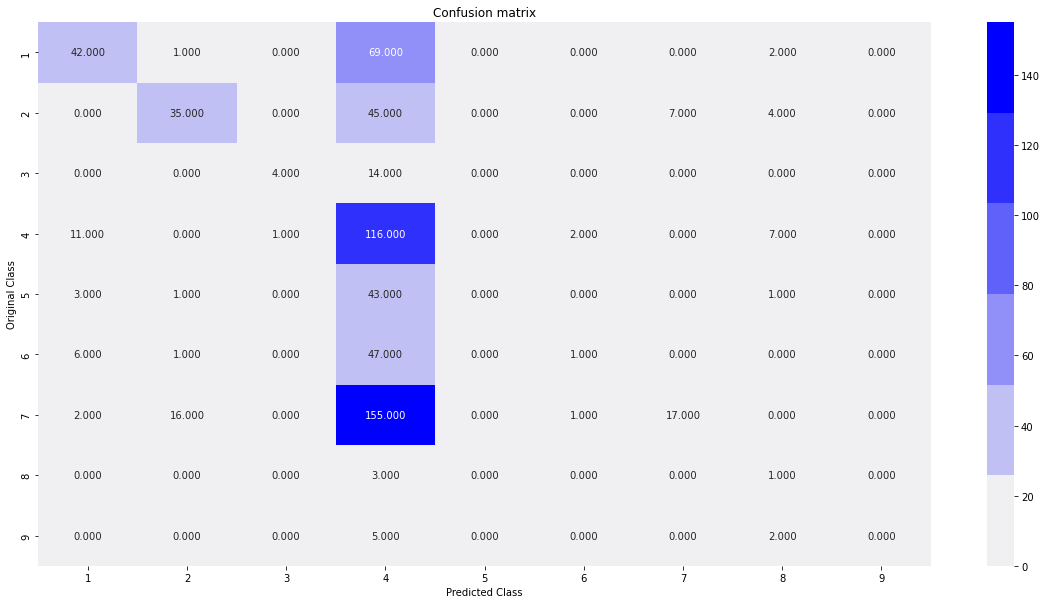

******************************************** Precision matrx ********************************************


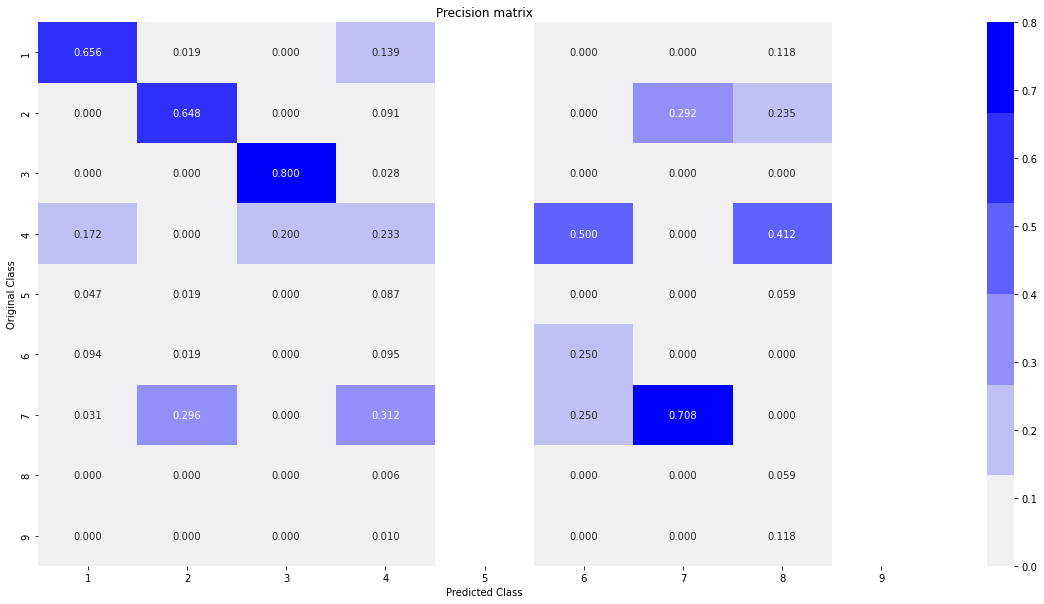

******************************************** Precision matrx ********************************************


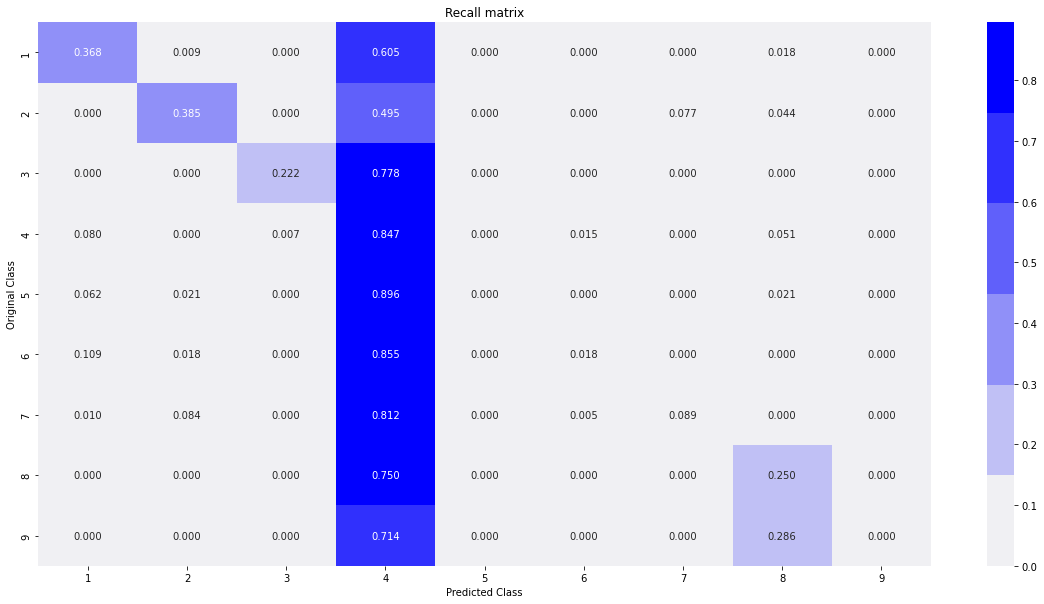

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.628571,0.575940,0.581955,0.476692,0.443609,0.324812,0.324812
f1_score,0.129392,0.621876,0.538058,0.561942,0.459242,0.394661,0.274136,0.280560
log_loss,2.470550,1.240911,1.447493,3.443405,2.221885,2.315739,2.462832,2.549234


[CV 1/2; 2/16] START base_estimator__max_depth=None, base_estimator__n_estimators=60, method=isotonic
[CV 1/2; 2/16] END base_estimator__max_depth=None, base_estimator__n_estimators=60, method=isotonic;, score=(train=-0.008, test=-0.054) total time=   0.9s
[CV 1/2; 5/16] START base_estimator__max_depth=None, base_estimator__n_estimators=70, method=sigmoid
[CV 1/2; 5/16] END base_estimator__max_depth=None, base_estimator__n_estimators=70, method=sigmoid;, score=(train=-0.051, test=-0.102) total time=   1.3s
[CV 2/2; 9/16] START base_estimator__max_depth=None, base_estimator__n_estimators=80, method=sigmoid
[CV 2/2; 9/16] END base_estimator__max_depth=None, base_estimator__n_estimators=80, method=sigmoid;, score=(train=-0.052, test=-0.086) total time=   1.4s
[CV 1/2; 14/16] START base_estimator__max_depth=None, base_estimator__n_estimators=90, method=isotonic
[CV 1/2; 14/16] END base_estimator__max_depth=None, base_estimator__n_estimators=90, method=isotonic;, score=(train=-0.006, test=-

In [124]:
lgbm_clf_response = CalibratedClassifierCV(LGBMClassifier(random_state = 42,class_weight = 'balanced'))
param_grids = {'base_estimator__boosting_type':['gbdt'],'base_estimator__n_estimators':[10,20,30,40,50,60],'method' : ['sigmoid','isotonic']}
lgbm_clf_response = GridSearchCV(estimator = lgbm_clf_response,param_grid = param_grids,cv = 2, scoring = 'neg_log_loss',verbose = 10,return_train_score=True)
lgbm_clf_response.fit(train_x_responseCoding,y_train)
print("Best Parameters are : " ,lgbm_clf_response.best_params_)
metrics(lgbm_clf_response.best_estimator_,test_x_responseCoding,test_y,'XGB',result_dataset_response_coding)
result_dataset_response_coding

In [125]:
result_dataset_response_coding

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.628571,0.575940,0.581955,0.476692,0.443609,0.324812,0.324812
f1_score,0.129392,0.621876,0.538058,0.561942,0.459242,0.394661,0.274136,0.280560
log_loss,2.470550,1.240911,1.447493,3.443405,2.221885,2.315739,2.462832,2.549234


In [128]:
result_dataset_onehot

,Random,KNN,NB,LR,SVC,DT,RF,XGB
accuracy_score,0.109774,0.547368,0.612030,0.655639,0.663158,0.481203,0.596992,0.619549
f1_score,0.129392,0.516112,0.589150,0.637583,0.657835,0.440305,0.554230,0.580127
log_loss,2.470550,1.254855,1.280016,1.035492,1.184624,1.519417,1.136225,1.125775
